# <center> Analysis of Donald Trump's Twitter Account During the 2016 and 2020 Presidential Campaign </center>
<a id='Top'></a>
ITEC 596 Data Analysis Project<br>
Rachel Regberg<br>
December 7, 2020<br>

## Table of Contents

**Introduction**<br>
**Libraries**</a><br>
**Data Import and Cleaning**<br>
**Exploratory Data Analysis**<br>
&emsp;<a href='#Month'>What Month Does Donald Trump Tweet The Most And The Least</a><br>
&emsp;<a href='#Week'>What Day Of The Week Does Donald Trump Tweet The Most And The Least</a><br>
&emsp;<a href='#Time'>What Time Of Day Does Donald Trump Tweet The Most And The Least</a><br>
&emsp;<a href='#Device'>What Device Does Donald Trump Tweet From The Most</a><br>
&emsp;<a href='#RetweetDelete'>How Often Does Trump Retweet And Delete Tweets</a><br>
&emsp;<a href='#RetweetMention'>Who Does Donald Trump Retweet And Mention</a><br>
&emsp;<a href='#Hashtags'>What Hashtags Does Donald Trump Use The Most</a><br>
&emsp;<a href='#Words'>Frequent Words And Phrases</a><br>
&emsp;&emsp;<a href='#NGrams'>Top Bigrams and Trigrams</a><br>
<a href='#Header2016_1'>**2016**</a><br>
&emsp;&emsp;<a href='#WordCount2016'>Word Count & Character Length</a><br>
&emsp;&emsp;<a href='#Images2016'>Tweets With Images</a><br>
<a href='#Header2020_1'>**2020**</a><br>
&emsp;&emsp;<a href='#WordCount2020'>Word Count & Character Length</a><br>
&emsp;&emsp;<a href='#Images2020'>Tweets With Images</a><br>
**Supervised Learning**<br>
<a href='#Header2016_2'>**2016**</a><br>
&emsp;&emsp;<a href='#Sentiment2016'> Sentiment Analysis</a><br>
&emsp;&emsp;&emsp;<a href='#TextBlob2016'>TextBlob</a><br>
&emsp;&emsp;&emsp;<a href='#Vader2016'>Vader</a><br>
&emsp;<a href='#TopicModeling2016'> Topic Modeling</a><br>
&emsp;&emsp;&emsp;<a href='#LDA2016'>LDA</a><br>
&emsp;&emsp;&emsp;<a href='#NMF2016'>NMF</a><br>
<a href='#Header2020_2'>**2020**</a><br>
&emsp;&emsp;<a href='#Sentiment2016'> Sentiment Analysis</a><br>
&emsp;&emsp;&emsp;<a href='#TextBlob2020'>TextBlob</a><br>
&emsp;&emsp;&emsp;<a href='#Vader2020'>Vader</a><br>
&emsp;<a href='#TopicModeling2020'> Topic Modeling</a><br>
&emsp;&emsp;&emsp;<a href='#LDA2020'>LDA</a><br>
&emsp;&emsp;&emsp;<a href='#NMF2020'>NMF</a><br>
**Conclusion**<br>
<a href='#Ref'>**References**</a><br>

# Introduction


Donald Trump is an avid user of Twitter and since his 2016 presidential campaign he has posted thousands of tweets. The importance of Twitter on presidential campaigns has increased over the years. Leah Libresco describes the importance of Donald Trump's tweets during his 2016 presidential campaign as, "They've consumed news cycles, antagonized opponents and riled up supporters. They've also been a defining feature of his unorthodox campaign. Truman had his whistle-stop tour. Kennedy had his TV ads. Donald Trump has his Twitter account." (Libresco, 2016)

It costs an exorbitant amount of money to successfully run a presidential campaign, which limits political newcomers from running successful campaigns. According to a Wharton podcast, "90% of incumbents are reelected in what research calls 'the incumbency advantage'." (Yildirim, 2020) The rise of social media has disrupted this advantage. Social media can level the playing field in politics and break down monetary barriers. 

Barack Obama was the first presidential candidate to utilize social media during his campaign. Wharton marketing professor Pinar Yildirim emphasizes the importance of using social media during presidential campaigns, "If you look at the way that politicians communicate today, it's very different than the way that they used to communicate five, 10 years ago. They would speak through the official speakers or they would be on TV. They would be in print or official online newspapers. Today, they are communicating through places like Twitter." (Yildirim, 2020). This shift in communication raises the question are there benefits to communicating via Twitter? 

A study conducted by Yildirim found that political newcomers can get a substantial boost in support by using social media (Yildirim, 2020). The study measured support for a candidate based on donations from individual citizens and whether that support increased after the candidate created a Twitter of Facebook account. The study found that, "Within the first month of using Twitter, politicians were able to raise between 1% and 3% of what they would have raised in a two-year traditional campaign. […] that gain flowed almost exclusively to newcomers, not incumbents. And it was amplified when candidates included hyperlinks to more information." (Yildirim, 2020) The findings from this study emphasize the important of analyzing Twitter accounts during presidential campaigns. 

The data for this analysis was gathered from the [Trump Twitter Archive](http://www.trumptwitterarchive.com/). The website was created by Brendan Brown and it includes nearly all of Trump's tweets from 2009 to the present day, with the exception of 4,000 tweets missing from the archive and any tweets that Trump deleted prior to September 2016. I created a dataset for Donald Trump's tweets from 2016, 2020 (up until October 24th) and a combined dataset. The 2016 dataset contains 4,225 tweets. The 2020 dataset contains 10,263 tweets.

The initial dataset contained the following variables:

**Variable**                 |  **Data Type**     |  **Definition**   
-----------------------------|--------------------|------------------
source                       |  Object(text)      |  The platform used to post the tweet      
id_str                       |  Int64             |  Identifying number for the tweet     
text                         |  Object (text)     |  The text of the tweet    
created_at                   |  Object (datetime) |  The date and time the tweet was posted
retweet_count                |  Int64 (Number)    |  How many times the tweet was retweeted
favorite_count               |  Int64 (Number)    |  How many times the tweet was favorited
is_retweet                   |  bool (True/False) |  If the tweet was a retweet

However, throughout the course of the project I ended up adding the following additional variables:

**Variable**                 |  **Data Type**     |  **Definition**   
-----------------------------|--------------------|------------------
Image                        |  bool (True/False) |  If the tweet contained an image or not      
clean_text                   |  Object (text      |  Cleaned text of the tweet    
mentioned                    |  Object (text)     |  The handle of who was mentioned    
hashtags                     |  Object (text)     |  The text of the hashtag(s)
character_len                |  Int64 (Number)    |  Character length of tweet
word_count                   |  Int64 (Number)    |  Word count of tweet
tweet_year                   |  Int64 (Number)    |  The year of the tweet
blob_polarity                |  Int64 (Number)    |  TextBlob polarity score
blob_subjectivity            |  Int64 (Number)    |  TextBlob subjectivity score
TextBlob                     |  Object (text)     |  TextBlob Sentiment
TextBlob_Subjectivity        |  Object (text)     |  TextBlob Subjectivity
neg                          |  Int64 (Number)    |  Vader negative score
neu                          |  Int64 (Number)    |  Vader neutral score
pos                          |  Int64 (Number)    |  Vader positive score
compound                     |  Int64 (Number)    |  Vader compound score
VADER                        |  Object (text)     |  Vader Sentiment
Topic_LDA                    |  Int64 (Number)    |  LDA Topic 
Topic_NMF                    |  Int64 (Number)    |  NMF Topic


This paper will analyze several aspects of Donald Trump's tweets from 2016 and 2020 ranging from time series analysis, frequent words and phrases, topic modeling, to sentiment analysis. For a detailed explanation of these methods please see **APPENDIX A: Introduction**.

---------
### Python Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from datetime import date
import calendar
from dateutil.parser import parse
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from dateutil import parser
from IPython.display import display_html 
import re
import unicodedata
import nltk
from sklearn.decomposition import LatentDirichletAllocation, NMF
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
from IPython.display import HTML

twitter_mask = np.array(Image.open('Images/twitter_mask.png'))

In [2]:
# Create N-Gram Function
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['rt']

def clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

def get_words(df, column):
    """
    Takes in a dataframe and columns and returns a list of
    words from the values in the specified column.
    """
    return clean(''.join(str(df[column].tolist())))

def get_bigrams(df, column):
    """
    Takes in a list of words and returns a series of
    bigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(get_words(df, column), 2)).value_counts())[:10]

def get_trigrams(df, column):
    """
    Takes in a list of words and returns a series of
    trigrams with value counts.
    """
    return (pd.Series(nltk.ngrams(get_words(df, column), 3)).value_counts())[:10]

def viz_bigrams(df ,column):
    get_bigrams(df, column).sort_values().plot.barh(width=.9, figsize=(12, 8))

    plt.title('10 Most Frequently Occuring Bigrams', fontsize = 8)
    plt.ylabel('Bigram', fontsize = 8)
    plt.xlabel('# Occurrences', fontsize = 8)

def viz_trigrams(df, column):
    get_trigrams(df, column).sort_values().plot.barh(width=.9, figsize=(12, 8))

    plt.title('10 Most Frequently Occuring Trigrams', fontsize = 8)
    plt.ylabel('Trigram', fontsize = 8)
    plt.xlabel('# Occurrences', fontsize = 8)

---------
### Data Import & Cleaning

In [3]:
# Read in Data
trump_2016 = pd.read_csv("Data/Trump_Tweets_2016.csv")
trump_2020 = pd.read_csv("Data/Trump_Tweets_2020.csv")

# Concat
Trump_Election = pd.concat([trump_2016, trump_2020])

In [4]:
# 2016 data frame cleaning

# Convert isRetweet to Boolean
trump_2016['isRetweet'] = trump_2016['isRetweet'].str.contains("t")

# Convert isDeleted to Boolean
trump_2016['isDeleted'] = trump_2016['isDeleted'].str.contains("t")

# Add a column to indicate whether the tweet had an image
trump_2016['Image'] = trump_2016['text'].str.contains('/t.co/')

# Remove weird symbols and create a clean_text column
words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words.txt')
words.columns=['word']
words = words['word'].str.lower().values.tolist()
trump_2016['clean_text'] = trump_2016.text.apply(lambda x: ' '.join([i for i in x.split(' ') if not (i.startswith('@') or i.startswith('#'))]))
trump_2016['clean_text'] = trump_2016.clean_text.str.lower().str.replace('[^a-zA]', ' ')

# Create column for Mentions
def find_mentioned(text):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)  
trump_2016['mentioned'] = trump_2016.text.apply(find_mentioned)

# Create column for Hashtags
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)
trump_2016['hashtags'] = trump_2016.text.apply(find_hashtags)

# Create columns for Character Length and Word Count of each tweet
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text
trump_2016['text'] = preprocess(trump_2016['text'])

trump_2016['character_len'] = trump_2016['text'].astype(str).apply(len)
trump_2016['word_count'] = trump_2016['text'].apply(lambda x: len(str(x).split()))

# Parse the date column to a timestamp
dt = []
for ts in trump_2016.date:
    dt.append(parse(ts))  

# Add a column with datetime that contains timestamp information
trump_2016['datetime'] = trump_2016.apply(lambda row: parse(row.date), axis = 1)

# Create a column that is the year of tweet
def year_func(ts):
    return ts.year
trump_2016['tweet_year'] = trump_2016['datetime'].apply(year_func)

In [5]:
# 2020 data frame cleaning

# Convert isRetweet to Boolean
trump_2020['isRetweet'] = trump_2020['isRetweet'].str.contains("t")

# Convert isDeleted to Boolean
trump_2020['isDeleted'] = trump_2020['isDeleted'].str.contains("t")

# Add a column to indicate whether the tweet had an image
trump_2020['Image'] = trump_2020['text'].str.contains('/t.co/')

# Remove weird symbols and create a clean_text column
words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words.txt')
words.columns=['word']
words = words['word'].str.lower().values.tolist()
trump_2020['clean_text'] = trump_2020.text.apply(lambda x: ' '.join([i for i in x.split(' ') if not (i.startswith('@') or i.startswith('#'))]))
trump_2020['clean_text'] = trump_2020.clean_text.str.lower().str.replace('[^a-zA]', ' ')

# Create column for Mentions
def find_mentioned(text):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)  
trump_2020['mentioned'] = trump_2020.text.apply(find_mentioned)

# Create column for Hashtags
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)
trump_2020['hashtags'] = trump_2020.text.apply(find_hashtags)

# Create columns for Character Length and Word Count of each tweet
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text
trump_2020['text'] = preprocess(trump_2020['text'])

trump_2020['character_len'] = trump_2020['text'].astype(str).apply(len)
trump_2020['word_count'] = trump_2020['text'].apply(lambda x: len(str(x).split()))

# Parse the date column to a timestamp
dt = []
for ts in trump_2020.date:
    dt.append(parse(ts))  

# Add a column with datetime that contains timestamp information
trump_2020['datetime'] = trump_2020.apply(lambda row: parse(row.date), axis = 1)

# Create a column that is the year of tweet
def year_func(ts):
    return ts.year
trump_2020['tweet_year'] = trump_2020['datetime'].apply(year_func)

In [6]:
# Combined data frame cleaning

# Convert isRetweet to Boolean
Trump_Election['isRetweet'] = Trump_Election['isRetweet'].str.contains("t")

# Convert isDeleted to Boolean
Trump_Election['isDeleted'] = Trump_Election['isDeleted'].str.contains("t")

# Add a column to indicate whether the tweet had an image
Trump_Election['Image'] = Trump_Election['text'].str.contains('/t.co/')

# Remove weird symbols and create a clean_text column
words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words.txt')
words.columns=['word']
words = words['word'].str.lower().values.tolist()
Trump_Election['clean_text'] = Trump_Election.text.apply(lambda x: ' '.join([i for i in x.split(' ') if not (i.startswith('@') or i.startswith('#'))]))
Trump_Election['clean_text'] = Trump_Election.clean_text.str.lower().str.replace('[^a-zA]', ' ')

# Create column for Mentions
def find_mentioned(text):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)  
Trump_Election['mentioned'] = Trump_Election.text.apply(find_mentioned)

# Create column for Hashtags
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)
Trump_Election['hashtags'] = Trump_Election.text.apply(find_hashtags)

# Create columns for Character Length and Word Count of each tweet
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text
Trump_Election['text'] = preprocess(Trump_Election['text'])

Trump_Election['character_len'] = Trump_Election['text'].astype(str).apply(len)
Trump_Election['word_count'] = Trump_Election['text'].apply(lambda x: len(str(x).split()))

# Parse the date column to a timestamp
dt = []
for ts in Trump_Election.date:
    dt.append(parse(ts))  

# Add a column with datetime that contains timestamp information
Trump_Election['datetime'] = Trump_Election.apply(lambda row: parse(row.date), axis = 1)

# Create a column that is the year of tweet
def year_func(ts):
    return ts.year
Trump_Election['tweet_year'] = Trump_Election['datetime'].apply(year_func)

# Exploratory Data Analysis


See **Appendix O** for Correlation Heatmaps of the data.<br>


---------
### <a id='Month'>What Month Does Donald Trump Tweet The Most And The Least</a>

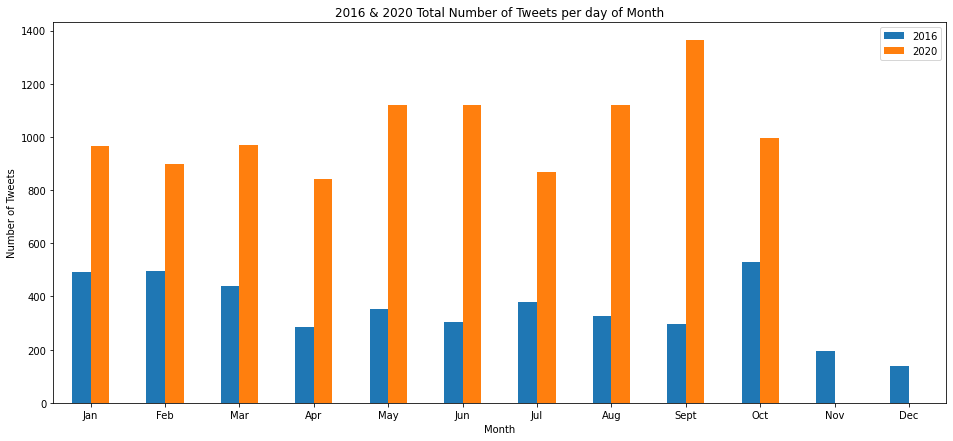

In [7]:
# Total Number of Tweets per Month
title = '2016 & 2020 Total Number of Tweets per day of Month'

Trump_Election.text.groupby([Trump_Election.datetime.dt.month, Trump_Election.tweet_year]).count().unstack(fill_value=0).plot(
    figsize=(16,7), kind='bar', rot=0, title = title)
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                          'Aug', 'Sept', 'Oct', 'Nov', 'Dec']) 
plt.legend()
plt.show()

|            | Average Tweets Per Month (/12)    | 
| :--------- | :-------------------------------: |
|  **2016**  | 352 tweets                        | 
|  **2020**  | 1,026 tweets                      | 

Despite not having a full year's worth of data for 2020 it is obvious that overall Donald Trump tweeted significantly more in 2020 compared to 2016. In 2016 Donald Trump tweeted 4,225 times and in 2020 (January through October 24th) he tweeted 10,263 times. 

In 2016, Donald Trump on average tweeted 352 times per month. In 2016, Trump tweeted the most in October. In October 2016 he tweeted 530 times. In 2016, Trump tweeted the least in December. In December 2016 he tweeted 138 times. On average in 2016 Trump tweeted 352 times per month.

In 2020, Donald Trump on average tweeted 1,026 times per month. In 2020, Trump tweeted the most in September. In September 2020 Trump tweeted 1,363 times. In 2020, Trump tweeted the least in April. In April 2020 Trump tweeted 840 times. On average in 2020, Trump tweeted 1,026 times per month.

---------
### <a id='Week'>What Day Of The Week Does Donald Trump Tweet The Most And The Least</a>

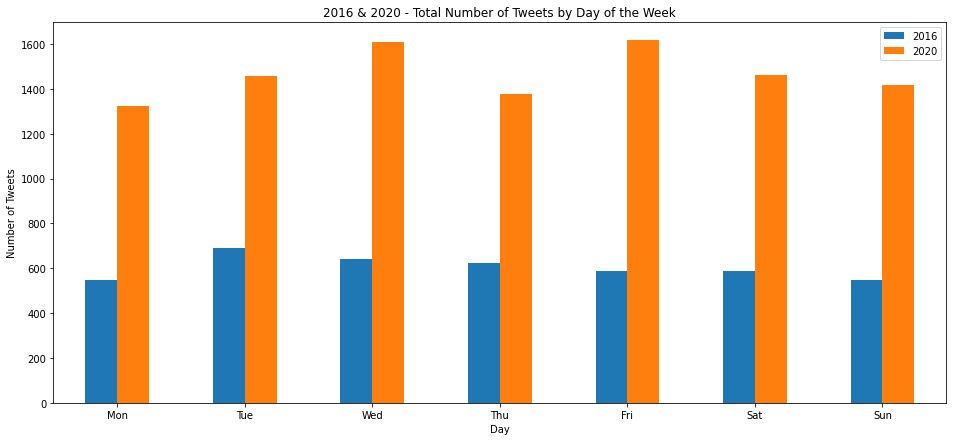

In [8]:
# Total Number of Tweets by day of week
title = '2016 & 2020 - Total Number of Tweets by Day of the Week'
Trump_Election.text.groupby([Trump_Election.datetime.dt.dayofweek, Trump_Election.tweet_year]).count().unstack(fill_value=0).plot(
    figsize=(16,7), kind='bar', rot=0, title = title)
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.show()

|            | Average Tweets Per Week (/52)     |                       
| :--------- | :-------------------------------: |                       
|  **2016**  | 81 tweets                         |                      
|  **2020**  | 197 tweets                        |                       

|            | Average Tweets Per Day  (/365)     | 
| :--------- | :--------------------------------: |
|  **2016**  | 12 tweets                          | 
|  **2020**  | 28 tweets                          | 

In 2016, Donald Trump tweeted an average of 81 times per week and an average 12 tweets per day. The majority of his tweets occured on Tuesdays, 692 tweets. The minority of his tweets occured on Mondays, 546 tweets.

In 2020, Donald trump tweeted an average of 197 times per week and an average 28 tweets per day. The majority of his tweets occured on Fridays, 1,616 tweets. The minority of his tweets occured on Monday, 1,324 tweets.

It appears that with this comparison Donald Trump consistently tweets less on Mondays.

---------
### <a id='Time'>What Time Of Day Does Donald Trump Tweet The Most And The Least</a>

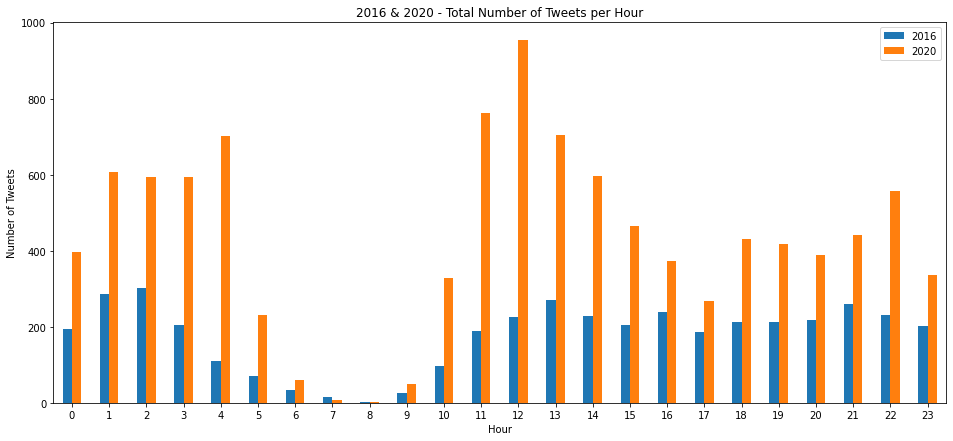

In [9]:
# Total Number of Tweets by day of week
title = '2016 & 2020 - Total Number of Tweets per Hour'
Trump_Election.text.groupby([Trump_Election.datetime.dt.hour, Trump_Election.tweet_year]).count().unstack(fill_value=0).plot(
    figsize=(16,7), kind='bar', rot=0, title = title)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

In 2016, Donald Trump tweeted the majority of his tweets at 2:00am, 303 tweets. The minority of his tweets occured at 8:00am, 2 tweets.

In 2020, Donald trump tweeted the majority of his tweets at 12:00pm, 953 tweets. The minority of his tweets occured at 8:00am, 1 tweet.

It appears that with this comparison Donald Trump consistently tweets less at 8:00am and during the morning hours. The theory is that Donald Trump tweets more during "off" hours because he is along and not around his advisors who would typically prevent him from tweeting.

---------
### <a id='Device'>What Device Does Donald Trump Tweet From The Most</a>

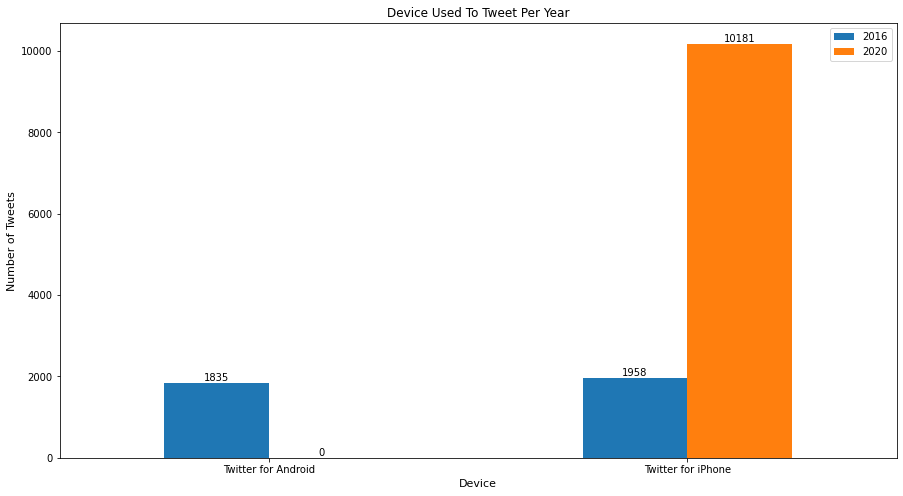

In [10]:
Device_Comp = Trump_Election.loc[(Trump_Election['device'] == 'Twitter for iPhone') | (Trump_Election['device'] == 'Twitter for Android'), :]

title = 'Device Used To Tweet Per Year'
ax = Device_Comp.text.groupby([Device_Comp.device, Device_Comp.tweet_year]).count().unstack(fill_value=0).plot.bar(
    rot=0, figsize=(15,8), title=title)

# Add count text
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
plt.xlabel('Device', fontsize = 11)
plt.ylabel('Number of Tweets', fontsize = 11)
plt.legend()
plt.show()    

As you can see from the plot above Donald Trump singificantly favors tweeting from an iPhone device. Other devices were used but overall the majority of Trump's tweets came from either an Android or iPhone device. Interestingly in 2020, Trump does not use an Android, the majority of his tweets come from an iPhone.

The theory is that the iPhone is handled by Trump's campaign staff so the tweets are announcements about events. While the Android is run by Trump himself (Robinson, 2016). According to the New York Times article, *How Trump Reshaped the Presidency in Over 11,000 Tweets*, Dan Scavino the White House social media director controls the @realDonaldTrump account during business hours. Scavino tweets from his own phone and computer, this can account for the differences in devices and sentiment analysis (discussed later); however Trump allegedly approves all tweets that Scavino posted.

---------
### <a id='RetweetDelete'>How Often Does Trump Retweet And Delete Tweets</a>

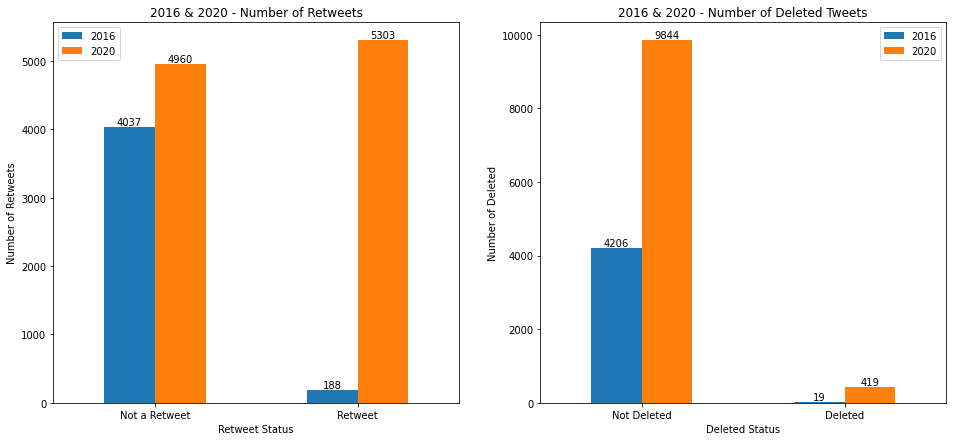

In [11]:
# Plot Retweets
fig_1=plt.subplot(1,2,1)
ax = Trump_Election.tweet_year.groupby(Trump_Election.isRetweet).value_counts().unstack(fill_value=0).plot(
    figsize=(16,7), kind = 'bar', rot = 0, ax=fig_1)
# Add count text
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
fig_1.set_title('2016 & 2020 - Number of Retweets')
fig_1.set_xlabel('Retweet Status')
fig_1.set_ylabel('Number of Retweets')
plt.xticks(np.arange(2),['Not a Retweet', 'Retweet'])
plt.legend()


# Plot Deleted
fig_2=plt.subplot(1,2,2)
ax = Trump_Election.tweet_year.groupby(Trump_Election.isDeleted).value_counts().unstack(fill_value=0).plot(
    figsize=(16,7), kind = 'bar', rot = 0, ax = fig_2)
# Add count text
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
fig_2.set_title('2016 & 2020 - Number of Deleted Tweets')
fig_2.set_xlabel('Deleted Status')
fig_2.set_ylabel('Number of Deleted')
plt.xticks(np.arange(2),['Not Deleted', 'Deleted'])

plt.legend()
plt.show()

|            | Retweets     |   Deleted    |              
| :--------- | :----------: | :----------: |                     
|  **2016**  | 188 tweets   |  19 tweets   |                
|  **2020**  | 5,303 tweets |  419 tweets  |

We can see above in 2016, 4% (188 tweets) of Donald Trump's tweets were retweets and 0.4% (19 tweets) were deleted. In 2020, 52% (5,303 teets) of Donald Trump's tweets were retweets and 4% (419 tweets) were deleted. 

-------
### <a id='RetweetMention'> Who Does Donald Trump Retweet And Mention</a>

For a breakdown of who Donald Trump retweets and mentions by year please see **Appendix C: Who Does Donald Trump Retweet and Mention**. 

In [12]:
# Isolating Twitter Handles from the Retweets
# Creating a Column with the original Tweet's Handle
pattern = re.compile('(?<=RT @).*?(?=:)')
Trump_Election_retweets = Trump_Election.loc[Trump_Election.isRetweet == True]
Trump_Election_retweets['original'] = [re.search(pattern, text).group(0) for text in Trump_Election_retweets.text]

# Drop unnecessary column
Trump_Election_retweets = Trump_Election_retweets.drop(columns = ['isRetweet', 'isDeleted', 'Image', 
                                                           'favorites', 'character_len', 'word_count', 'id', 'tweet_year'])

# Create  dataframe that contains only the original Twitter handles and # of times Trump Retweeted them.
Trump_Election_original_count = Trump_Election_retweets.original.value_counts().reset_index()
Trump_Election_original_count.rename(columns = {'index':'original', 'original':'count'}, inplace = True)

# Mentions
mention_tweets = Trump_Election[~Trump_Election['text'].str.contains("RT")  & Trump_Election['text'].str.contains("@")]
mentions_Trump_Election = mention_tweets.text.str.extractall(r'(\@\w+)')[0].value_counts()
mentions_Trump_Election = pd.DataFrame(mentions_Trump_Election)
mentions_Trump_Election.reset_index(inplace=True)
mentions_Trump_Election.rename(columns = {'index':'user', 0:'count'}, inplace = True)

# Comparison Table
df1 = Trump_Election_original_count.head(10)
df2 = mentions_Trump_Election.head(10)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Retweets')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Mentions')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

/mnt/ebs/env/itec600/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,original,count
0,realDonaldTrump,505
1,WhiteHouse,399
2,TeamTrump,208
3,GOPChairwoman,96
4,DanScavino,92
5,GOP,86
6,GreggJarrett,86
7,DonaldJTrumpJr,65
8,paulsperry_,65
9,SenateGOP,60


Above is a side-by-side table comparing the top 10 overall (2016 and 2020 combined) users that Donald Trump retweets and mentions and how often.

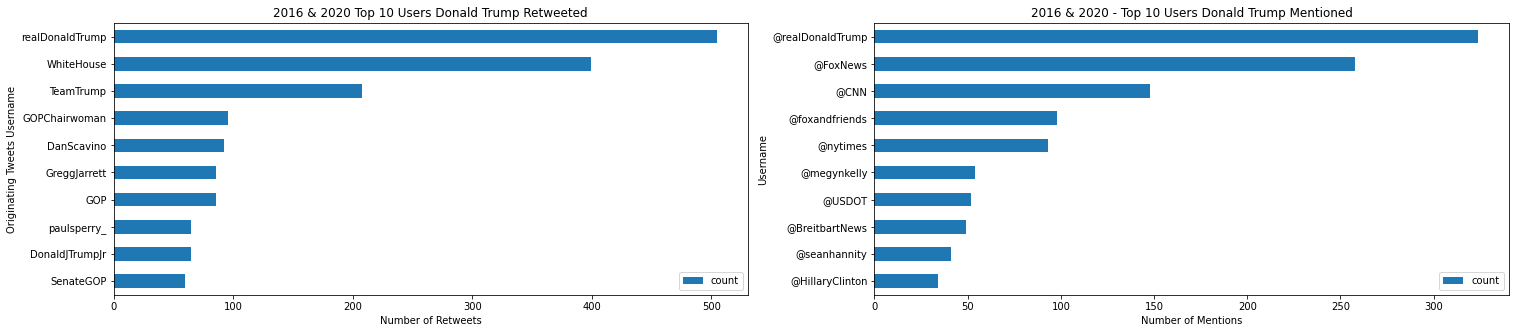

In [13]:
# Plot Retweets
fig_1=plt.subplot(1,2,1)
ax = Trump_Election_original_count[:10].sort_values('count').plot.barh(
    x='original', y='count', figsize=(25,5), fontsize=10, ax = fig_1)
fig_1.set_title('2016 & 2020 Top 10 Users Donald Trump Retweeted')
fig_1.set_xlabel('Number of Retweets')
fig_1.set_ylabel('Originating Tweets Username')


# Mentions
fig_2=plt.subplot(1,2,2)
ax = mentions_Trump_Election[:10].sort_values('count').plot.barh(x='user', y='count', figsize=(25,5), fontsize=10, ax = fig_2)
fig_2.set_title('2016 & 2020 - Top 10 Users Donald Trump Mentioned')
fig_2.set_xlabel('Number of Mentions')
fig_2.set_ylabel('Username')
plt.show()

As we can see above in 2016 and 2020 Donald Trump retweeted @realDonaldTrump (himself) the most with 505 retweets. In 2016 and 2020, Trump mentioned @realDonaldTrump (himself) the most with 324 mentions. 

Please see **Appendix B: Comparison Retweets & Mention WordCloud** for two WordClouds of who Trump retweeted the most and who he mentioned the most overall.

In [14]:
## 2016
#See the percentage of tweets from the initial set that are #retweets:
RT_tweets_2016 = trump_2016[trump_2016['isRetweet'] == True]

#See the percentage of tweets from the initial set that have #mentions and are not retweets:
mention_tweets_2016 = trump_2016[~trump_2016['text'].str.contains("RT")  & trump_2016['text'].str.contains("@")]

#See how many tweets have images
image_tweets_2016 = trump_2016[trump_2016['text'].str.contains('/t.co/')]


## 2020
#See the percentage of tweets from the initial set that are #retweets:
RT_tweets_2020 = trump_2020[trump_2020['isRetweet'] == True]

#See the percentage of tweets from the initial set that have #mentions and are not retweets:
mention_tweets_2020 = trump_2020[~trump_2020['text'].str.contains("RT")  & trump_2020['text'].str.contains("@")]

#See how many tweets have images
image_tweets_2020 = trump_2020[trump_2020['text'].str.contains('/t.co/')]

In [15]:
print(f"In 2016, {round(len(RT_tweets_2016)/len(trump_2016)*100)}% of Donald Trump's tweets were retweets.")
print(f"In 2020, {round(len(RT_tweets_2020)/len(trump_2020)*100)}% of Donald Trump's tweets were retweets.")
print('--------------------------------------------------------------------------------------------------------------------')    

print(f"In 2016, {round(len(mention_tweets_2016)/len(trump_2016)*100)}% of Donald Trump's tweets (excluding retweets) contained mentions.")
print(f"In 2020, {round(len(mention_tweets_2020)/len(trump_2020)*100)}% of Donald Trump's tweets (excluding retweets) contained mentions.")
print('--------------------------------------------------------------------------------------------------------------------')    

print(f"In 2016, {round(len(image_tweets_2016)/len(trump_2016)*100)}% of Donald Trump's tweets contained images.")
print(f"In 2020, {round(len(image_tweets_2020)/len(trump_2020)*100)}% of Donald Trump's tweets contained images.")

In 2016, 4% of Donald Trump's tweets were retweets.
In 2020, 52% of Donald Trump's tweets were retweets.
--------------------------------------------------------------------------------------------------------------------
In 2016, 30% of Donald Trump's tweets (excluding retweets) contained mentions.
In 2020, 10% of Donald Trump's tweets (excluding retweets) contained mentions.
--------------------------------------------------------------------------------------------------------------------
In 2016, 42% of Donald Trump's tweets contained images.
In 2020, 37% of Donald Trump's tweets contained images.


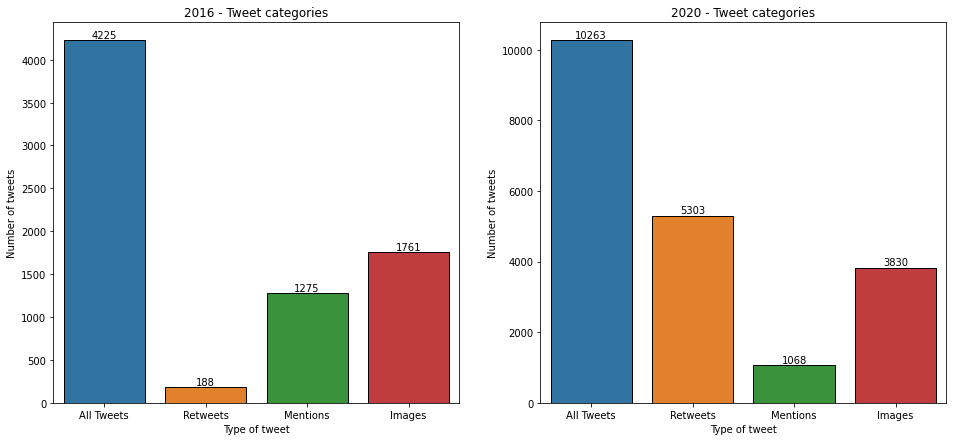

In [16]:
plt.figure(figsize=(16,7))

# 2016
fig_1=plt.subplot(1,2,1)
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list_2016 = [ len(trump_2016), len(RT_tweets_2016),len(mention_tweets_2016), len(image_tweets_2016)]
item_list_2016 = ['All Tweets','Retweets', 'Mentions', 'Images']

ax = sns.barplot(x = item_list_2016, y = len_list_2016,  edgecolor = 'black', linewidth=1, ax=fig_1)
# Add count text
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
    
fig_1.set_title('2016 - Tweet categories')
fig_1.set_xlabel('Type of tweet')
fig_1.set_ylabel('Number of tweets')    

# 2020
fig_2=plt.subplot(1,2,2)
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list_2020 = [ len(trump_2020), len(RT_tweets_2020),len(mention_tweets_2020), len(image_tweets_2020)]
item_list_2020 = ['All Tweets','Retweets', 'Mentions', 'Images']

fig_2.set_title('2020 - Tweet categories')
fig_2.set_xlabel('Type of tweet')
fig_2.set_ylabel('Number of tweets')
ax = sns.barplot(x = item_list_2020, y = len_list_2020,  edgecolor = 'black', linewidth=1, ax=fig_2)
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
plt.show()

-----
### <a id='Hashtags'> What Hashtags Does Donald Trump Use The Most</a>

For a WordCloud of who Donald Trump retweets and mentions per year please see **Appendix D: What Hashtags Does Donald Trump Use The Most**. 

In [17]:
# Top 10 Hashtags - 2016
hashtags_2016 = trump_2016.text.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags_2016 = pd.DataFrame(hashtags_2016)
hashtags_2016.reset_index(inplace=True)
hashtags_2016.rename(columns = {'index':'hashtag', 0:'count'}, inplace = True)

# Top 10 Hashtags - 2020
hashtags_2020 = trump_2020.text.str.extractall(r'(\#\w+)')[0].value_counts()
hashtags_2020 = pd.DataFrame(hashtags_2020)
hashtags_2020.reset_index(inplace=True)
hashtags_2020.rename(columns = {'index':'hashtag', 0:'count'}, inplace = True)

In [18]:
# Comparison Table
df1 = hashtags_2016.head(10)
df2 = hashtags_2020.head(10)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('2016-Hashtags')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('2020-Hashtags')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,hashtag,count
0,#Trump2016,274
1,#MakeAmericaGreatAgain,262
2,#MAGA,88
3,#AmericaFirst,79
4,#DrainTheSwamp,73
5,#VoteTrump,62
6,#BigLeagueTruth,55
7,#Trump2016https,54
8,#ImWithYou,43
9,#CrookedHillary,40


Above are the top 10 hashtags Donald Trump used in 2016 and 2020. The 2016 hashtags relate to the presidential election. The hashtags from 2020 related to the presential election and Coronavirus.

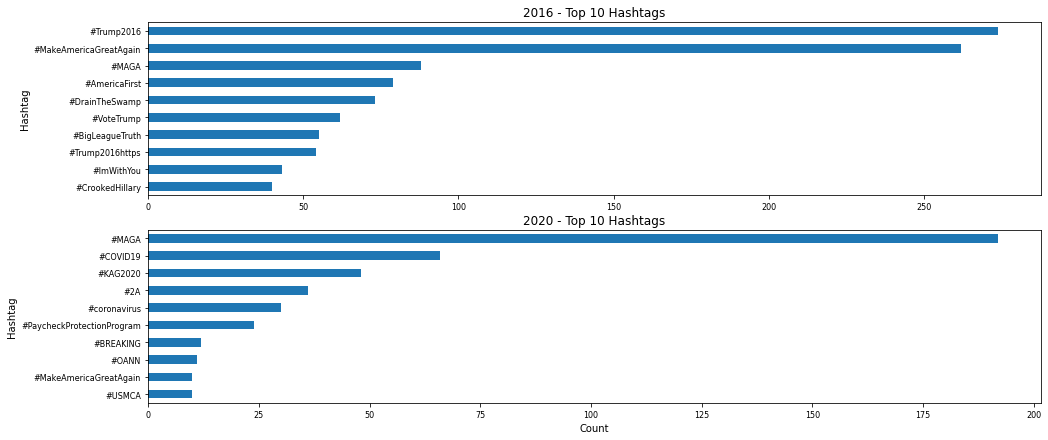

In [19]:
# Plot Top 10 Hashtags - 2016
fig_1=plt.subplot(2,1,1)
trump_2016.text.str.extractall(r'(\#\w+)')[0].value_counts().head(10).plot.barh(
    figsize=(16,7), rot=0, ax = fig_1, fontsize=8)
plt.title('2016 - Top 10 Hashtags')
plt.gca().invert_yaxis()
plt.ylabel('Hashtag')

# Plot Top 10 Hashtags - 2020
fig_2=plt.subplot(2,1,2)
trump_2020.text.str.extractall(r'(\#\w+)')[0].value_counts().head(10).plot.barh(
    figsize=(16,7), rot=0, ax=fig_2, fontsize=8)
plt.title('2020 - Top 10 Hashtags')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

-----
### <a id='Words'>Frequent Words And Phrases</a>

In [20]:
# 2016 - Top 10 Most Frequent Words
from nltk.corpus import stopwords

stops =  set(stopwords.words('english')+['com'])
stops.add('https')
stops.add('co')
stops.add('rt')
stops.add('amp')
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(trump_2016.text)
trump_2016_freqword = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
trump_2016_freqword.reset_index(inplace=True)
trump_2016_freqword.rename(columns = {'index':'word', 0:'count'}, inplace = True)

In [21]:
# 2020 - Top 10 Most Frequent Words
from nltk.corpus import stopwords

stops =  set(stopwords.words('english')+['com'])
stops.add('https')
stops.add('co')
stops.add('rt')
stops.add('amp')
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(trump_2020.text)
trump_2020_freqword = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
trump_2020_freqword.reset_index(inplace=True)
trump_2020_freqword.rename(columns = {'index':'word', 0:'count'}, inplace = True)

In [22]:
# Comparison Table
df1 = trump_2016_freqword.head(10)
df2 = trump_2020_freqword.head(10)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('2016-Top 10 Frequent Words')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('2020-Top 10 Frequent Words')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,word,count
0,thank,641
1,great,606
2,hillary,492
3,trump,472
4,realdonaldtrump,398
5,clinton,316
6,america,299
7,people,286
8,trump2016,281
9,makeamericagreatagain,268


Above are Donald Trump's top 10 most frequently used words from 2016 and 2020. The top 10 words in 2016 relate to the presidential election. The top 10 words in 2016 relate mostly to the presidential election.It is interesting to note that while variations of Coronavirus were among the top 10 hashtags Trump used, the actual word Coronavirus is 24th on the frequently used word list, with 327 uses.

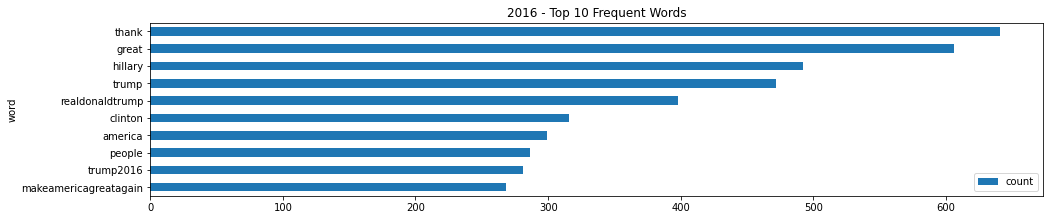

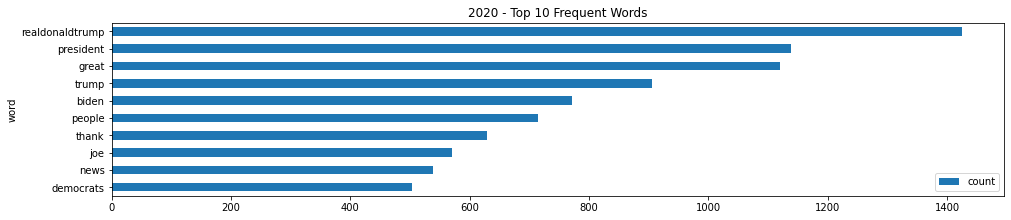

In [23]:
# 2016 - Top 10 words visualized
plt.figure(figsize=(16,7))
fig_1=plt.subplot(2,1,1)

# Plot horizontal bar graph
trump_2016_freqword[:10].sort_values(by='count').plot.barh(x='word',
                      y='count',
                      ax=fig_1)
fig_1.set_title("2016 - Top 10 Frequent Words")


# 2020 - Top 10 words visualized
plt.figure(figsize=(16,7))
fig_2=plt.subplot(2,1,2)

# Plot horizontal bar graph
trump_2020_freqword[:10].sort_values(by='count').plot.barh(x='word',
                      y='count',
                      ax=fig_2)
fig_2.set_title("2020 - Top 10 Frequent Words")

plt.show()

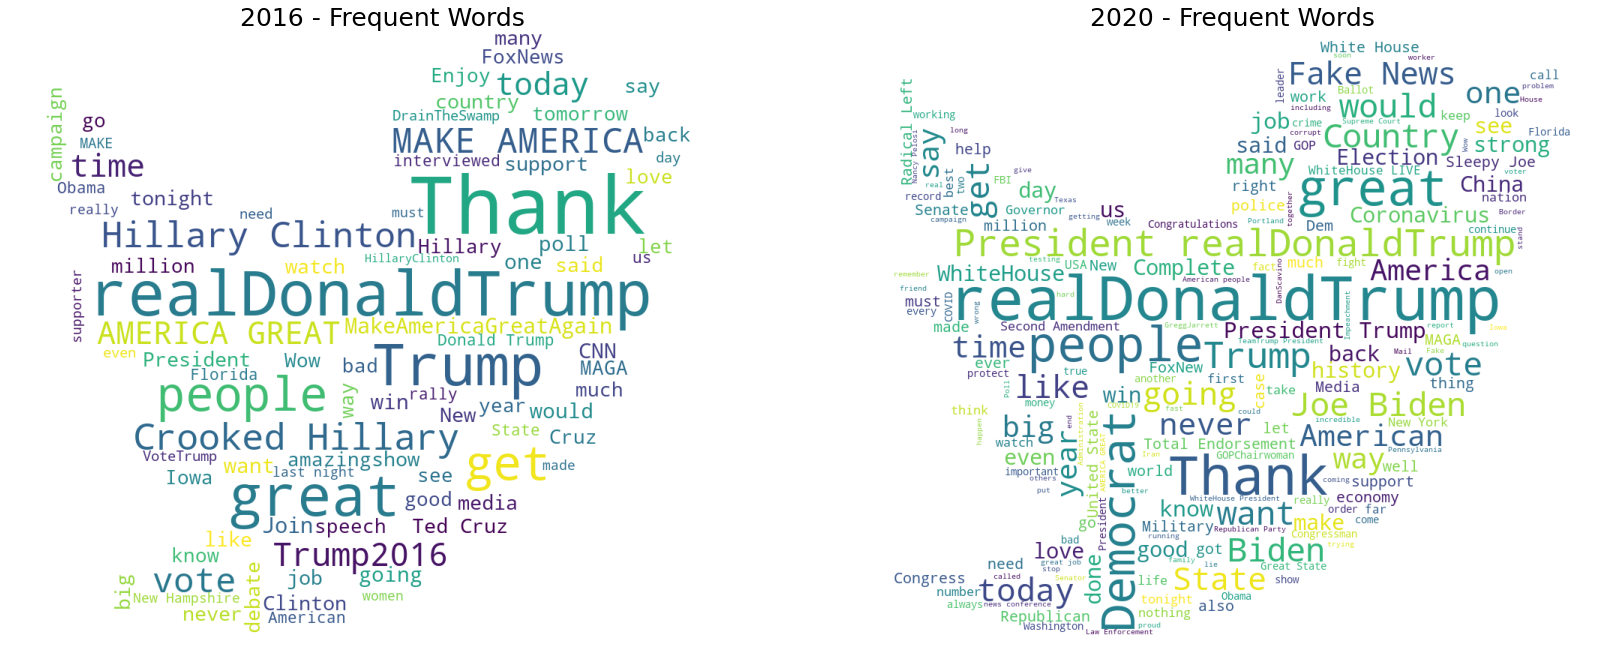

In [24]:
fig = plt.figure(num=2, figsize=(25, 25))
from nltk.corpus import stopwords
stopwords =  set(stopwords.words('english')+['com'])

#stopwords = set(STOPWORDS) 
stopwords.add('https')
stopwords.add('co')
stopwords.add('amp')
stopwords.add('RT')
stopwords.add('will')

# 2016 - Frequent Words
tweet_text = '' 


# iterate through the data 
for val in trump_2016.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    tweet_text += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10, 
                mask=twitter_mask).generate(tweet_text) 
  
fig.add_subplot(1,2,1)    
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title('2016 - Frequent Words', fontsize=25)
plt.tight_layout(pad = 10) 
  
# 2020 - Frequent Words 
tweet_text = '' 


# iterate through the data 
for val in trump_2020.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    #for i in range(len(tokens)): 
     #   tokens[i] = tokens[i].lower() 
      
    tweet_text += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                mask=twitter_mask).generate(tweet_text) 

fig.add_subplot(1,2,2)    
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title('2020 - Frequent Words', fontsize=25)
plt.tight_layout(pad = 10) 
  
plt.show()

#### <a id='NGrams'><center>Top Bigrams and Trigrams</center></a>

In [25]:
# Comparison Table
## 2016
df1 = pd.DataFrame(get_bigrams(trump_2016, 'text'))
df1.reset_index(inplace=True)
df1.rename(columns = {'index':'N-Gram', 0:'count'}, inplace = True)

df2 = pd.DataFrame(get_trigrams(trump_2016, 'text'))
df2.reset_index(inplace=True)
df2.rename(columns = {'index':'N-Gram', 0:'count'}, inplace = True)

## 2020
df3 = pd.DataFrame(get_bigrams(trump_2020, 'text'))
df3.reset_index(inplace=True)
df3.rename(columns = {'index':'N-Gram', 0:'count'}, inplace = True)

df4 = pd.DataFrame(get_trigrams(trump_2020, 'text'))
df4.reset_index(inplace=True)
df4.rename(columns = {'index':'N-Gram', 0:'count'}, inplace = True)


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('2016-Top 10 Bigrams')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('2016-Top 10 Trigrams')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('2020-Top 10 Bigrams')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('2020-Top 10 Trigrams')

display_html(df1_styler._repr_html_()+df3_styler._repr_html_()+df2_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,N-Gram,count
0,"('crooked', 'hillary')",209
1,"('hillary', 'clinton')",186
2,"('make', 'america')",184
3,"('america', 'great')",152
4,"('ted', 'cruz')",99
5,"('new', 'hampshire')",60
6,"('last', 'night')",56
7,"('donald', 'trump')",56
8,"('new', 'york')",47
9,"('south', 'carolina')",41


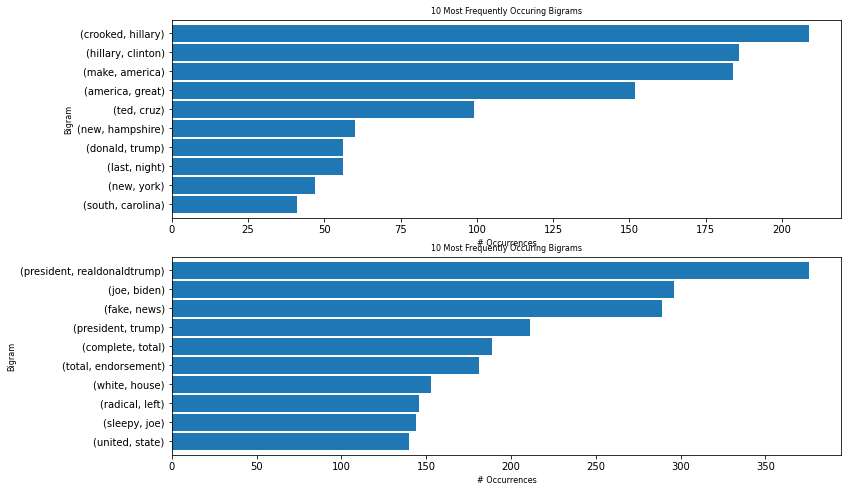

In [26]:
# 2016-Visualize Bigrams
plt.subplot(2, 1, 1)
viz_bigrams(trump_2016, 'text')

# 2020-Visualize Bigrams
plt.subplot(2, 1, 2)
viz_bigrams(trump_2020, 'text')

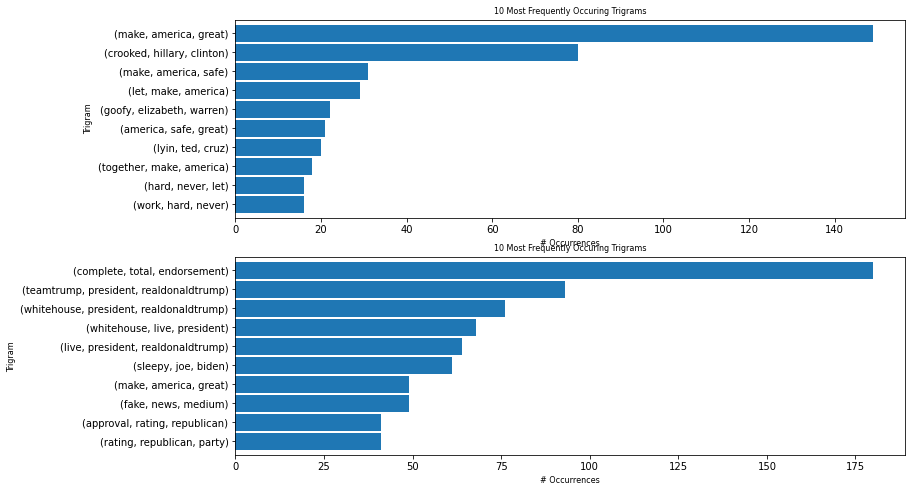

In [27]:
# 2016-Visualize Trigrams
plt.subplot(2, 1, 1)
viz_trigrams(trump_2016, 'text')

# 2020-Visualize Trigrams
plt.subplot(2, 1, 2)
viz_trigrams(trump_2020, 'text')

Above is a table of the top 10 bigrams and trigrams from 2016 and 2020, as well as stacked plots (2016 is on top of each subplot). In 2016 the majoriy of N-Grams were related to the 2016 presidential election. In 2020, the majority of the N-Grams were related to the 2020 presidential election. Again, Coronavirus is not part of Trump's 2020 top N-Grams.

-------
## <center><a id='Header2016_1'>2016</a></center>

#### <a id='WordCount2016'><center>Word Count & Character Length</center></a>

count    4225.000000
mean       17.112189
std         6.781646
min         1.000000
25%        12.000000
50%        18.000000
75%        23.000000
max        30.000000
Name: word_count, dtype: float64


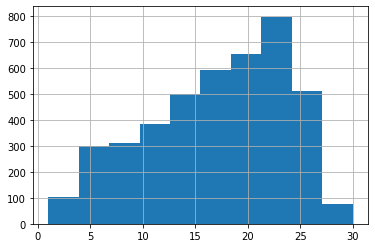

In [28]:
# Word Length
print(trump_2016['word_count'].describe())
trump_2016['word_count'].hist()
plt.show()

In 2016, Donald Trump's longest tweet by word count was 30 words and his shortest tweet was 1 word. Trump's tweets average 17 words per tweet.

Trump had 8 tweets that contained 30 words, below is an example of one: <br>
<img src="./Images/2016_longest_tweet.JPG" width = 550/>

Trump's shortest tweet was 1 word; however, it was a tweet that contained a video. Trump's shortest tweet with text was 2 words, below is an example:<br>
<img src="./Images/2016_shortest_tweet.JPG" width = 550/>


count    4225.000000
mean      115.496331
std        29.674234
min        14.000000
25%        98.000000
50%       129.000000
75%       139.000000
max       146.000000
Name: character_len, dtype: float64


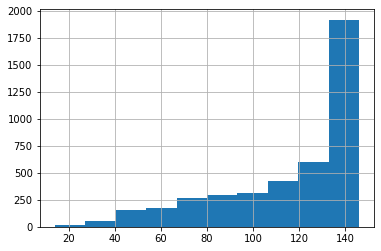

In [29]:
# Character Length
print(trump_2016['character_len'].describe())
trump_2016['character_len'].hist()
plt.show()

In 2016, Donald Trump's longest tweet by character length was 146 characters and his shortest tweet was 14 characters. Trump's averaged 115 characters. 

In 2016, Trump had 12 tweets that were 146 characters long, below is an example:<br>
<img src="./Images/2016_longest_characters.JPG" width = 550 />

Trump's shortest tweet was 14 characters, below is an example:<br>
<img src="./Images/2016_shortest_char.JPG" width = 550 />

*NOTE: The Twitter character limit is 280 characters.  However, if you are a verified user like Trump then you have an additional 140 characters. So Trump's character limit is actually 420 characters.*

#### <a id='Images2016'><center>Tweets With Images</center></a>

As noted by a graph above in the EDA section, in 2016, 1,761 or 42%, of Donald Trump's tweets contained an image or video. 

In [30]:
# Create a df of just tweets with images
trump_2016_image = trump_2016[trump_2016['Image'] == True]

In [31]:
# How many image tweets are retweets
print(f"In 2016, {trump_2016_image[trump_2016_image['isRetweet'] == True].shape[0]} or {round((trump_2016_image[trump_2016_image['isRetweet'] == True].shape[0]/trump_2016_image.shape[0])*100)}%, of Trump's tweets with images were retweets.")

# How many image tweets are deleted
print(f"In 2016, {trump_2016_image[trump_2016_image['isDeleted'] == True].shape[0]} or {round((trump_2016_image[trump_2016_image['isDeleted'] == True].shape[0]/trump_2016_image.shape[0])*100)}%, of Trump's tweets with images were deleted.")

In 2016, 95 or 5%, of Trump's tweets with images were retweets.
In 2016, 14 or 1%, of Trump's tweets with images were deleted.


count    1761.000000
mean       12.572402
std         5.793855
min         1.000000
25%         8.000000
50%        13.000000
75%        17.000000
max        27.000000
Name: word_count, dtype: float64


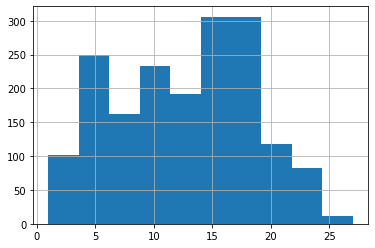

In [32]:
# Average word count of image tweets
print(trump_2016_image['word_count'].describe())
trump_2016_image['word_count'].hist()
plt.show()

We can see that in 2016, Donald Trump's average word count for tweets containing images was 12 words. 

count    1761.000000
mean      107.136854
std        31.265578
min        23.000000
25%        82.000000
50%       116.000000
75%       135.000000
max       146.000000
Name: character_len, dtype: float64


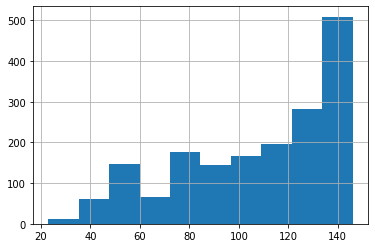

In [33]:
# Average character length of image tweets
print(trump_2016_image['character_len'].describe())
trump_2016_image['character_len'].hist()
plt.show()

We can see that in 2016, Donald Trump's average character length for tweets containing images was 107 characters. 

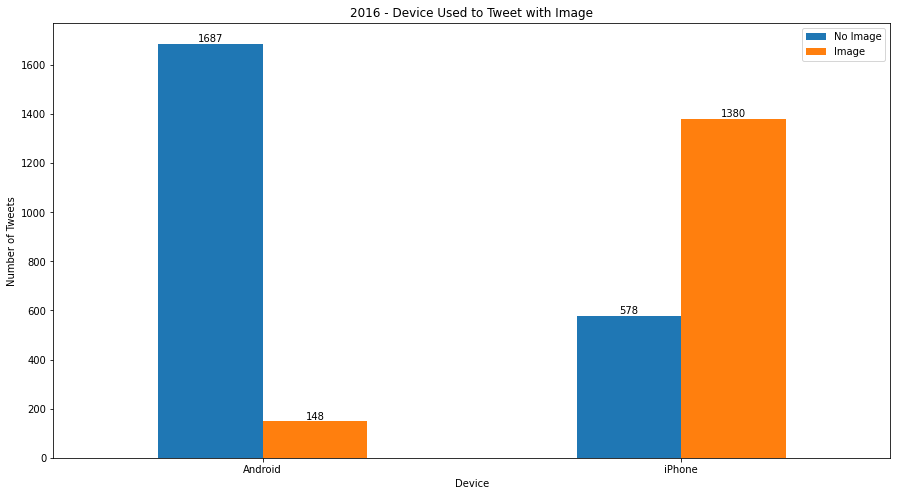

In [34]:
# Image plot vs device
title = "2016 - Device Used to Tweet with Image"
trump_2016_iphone_android = trump_2016.loc[(trump_2016['device'] == 'Twitter for iPhone') | (trump_2016['device'] == 'Twitter for Android'), :]

ax = trump_2016_iphone_android.text.groupby([trump_2016_iphone_android.device, trump_2016_iphone_android.Image]).count().unstack(fill_value=0).plot.bar(
    rot=0, figsize=(15,8), title=title)

# Add count text
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
    
plt.xlabel('Device')
plt.ylabel('Number of Tweets')
plt.xticks(np.arange(2),['Android', 'iPhone'])
plt.legend(['No Image', 'Image'])
plt.show()

I only compared Android vs iPhone because those are the top devices Trump uses. As you can see he posts significantly more tweets containing images when he tweets from an iPhone versus when he tweets from an Android. The theory is that the iPhone is handled by Trump's campaign staff so the tweets are announcements about events (Robinson, 2016). While the Android is run by Trump himself.


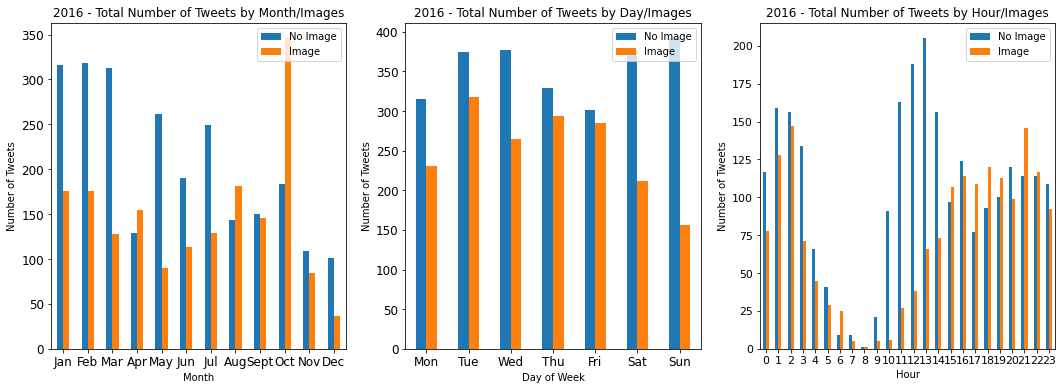

In [35]:
# Image Tweets - Month
fig_1 = plt.subplot(1,3,1)
trump_2016.text.groupby([trump_2016.datetime.dt.month, trump_2016.Image]).count().unstack(fill_value=0).plot(
    figsize=(18,6), fontsize=12, kind="bar", rot=0, ax=fig_1)
fig_1.set_title('2016 - Total Number of Tweets by Month/Images')
fig_1.set_xlabel('Month')
fig_1.set_ylabel('Number of Tweets')
plt.xticks(np.arange(12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                          'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(['No Image', 'Image'], loc=1)


# Image Tweets - Day of Week
fig_2 = plt.subplot(1,3,2)
trump_2016.text.groupby([trump_2016.datetime.dt.dayofweek, trump_2016.Image]).count().unstack(fill_value=0).plot(
    figsize=(18,6), fontsize=12, kind="bar", rot=0, ax=fig_2)
fig_2.set_title('2016 - Total Number of Tweets by Day/Images')
fig_2.set_xlabel('Day of Week')
fig_2.set_ylabel('Number of Tweets')
plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(['No Image', 'Image'], loc = 1)


# Image Tweets - Hour
fig_3 = plt.subplot(1,3,3)
trump_2016.text.groupby([trump_2016.datetime.dt.hour, trump_2016.Image]).count().unstack(fill_value=0).plot(
    figsize=(18,6), fontsize=11, kind="bar", rot=0, ax=fig_3)
fig_3.set_title('2016 - Total Number of Tweets by Hour/Images')
fig_3.set_xlabel('Hour')
fig_3.set_ylabel('Number of Tweets')
plt.legend(['No Image', 'Image'], loc=1)

plt.show()

Above is a comparison of how often Donald Trump's tweets contained images in 2016 by Month, Day, and Hour. We can see that in October, Trump's tweets contained significantly more images, as well as tweets posted around 9:00pm.

-------
## <center><a id='Header2020'>2020</a></center>

#### <a id='WordCount2020'><center>Word Count & Character Length</center></a>

count    10263.000000
mean        20.699016
std         13.200843
min          1.000000
25%         11.000000
50%         20.000000
75%         25.000000
max         59.000000
Name: word_count, dtype: float64


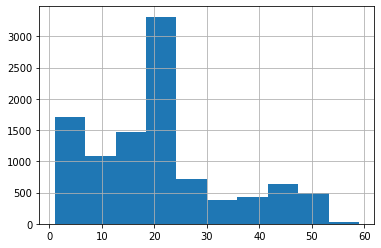

In [36]:
# Word Length
print(trump_2020['word_count'].describe())
trump_2020['word_count'].hist()
plt.show()

In 2020, Donald Trump's longest tweet by word count was 59 words and his shortest tweet was 1 word. Trump's tweets average 21 words per tweet.

Trump had 1 tweet that contained 59 words, below is an example of one:<br>
<img src="./Images/2020_longest.JPG" width = 550/>

Trump's shortest tweet was 1 word; however, it was a tweet that contained an image/link. Trump's shortest tweet with text was 2 words, below is an example:<br>
<img src="./Images/2020_shortest_word_noimage.JPG" width = 550/>

count    10263.000000
mean       133.872454
std         71.867240
min          6.000000
25%         86.000000
50%        140.000000
75%        140.000000
max        304.000000
Name: character_len, dtype: float64


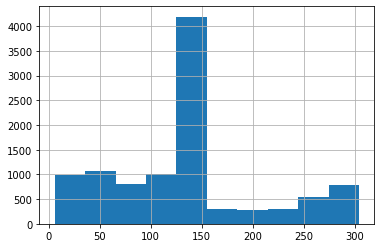

In [37]:
# Character Length
print(trump_2020['character_len'].describe())
trump_2020['character_len'].hist()
plt.show()

In 2020, Donald Trump's longest tweet by character length was 304 characters and his shortest tweet was 6 characters. Trump's averaged 134 characters. 

In 2020, Trump had 14 tweets that were 304 characters long, below is an example:<br>
<img src="./Images/2020_longest_character_len.JPG" width = 550/>

Trump's shortest tweet was 1 characters, below is an example:<br>
<img src="./Images/2020_shortest_character_len.JPG" width = 550/>

*NOTE: The Twitter character limit is 280 characters.  However, if you are a verified user like Trump then you have an additional 140 characters. So Trump's character limit is actually 420 characters.*

#### <a id='Images2020'><center>Tweets With Images</center></a>

As noted by a graph above in the EDA section, in 2020, 3,830 or 37%, of Donald Trump's tweets contained an image or video. 

In [38]:
# Create a df of just tweets with images
trump_2020_image = trump_2020[trump_2020['Image'] == True]

In [39]:
# How many image tweets are retweets
print(f"In 2020, {trump_2020_image[trump_2020_image['isRetweet'] == True].shape[0]} or {round((trump_2020_image[trump_2020_image['isRetweet'] == True].shape[0]/trump_2020_image.shape[0])*100)}%, of Trump's tweets with images were retweets.")

# How many image tweets are deleted
print(f"In 2020, {trump_2020_image[trump_2020_image['isDeleted'] == True].shape[0]} or {round((trump_2020_image[trump_2020_image['isDeleted'] == True].shape[0]/trump_2020_image.shape[0])*100)}%, of Trump's tweets with images were deleted.")

In 2020, 1325 or 35%, of Trump's tweets with images were retweets.
In 2020, 120 or 3%, of Trump's tweets with images were deleted.


count    3830.000000
mean       13.163446
std        12.204466
min         1.000000
25%         3.000000
50%        10.000000
75%        18.000000
max        57.000000
Name: word_count, dtype: float64


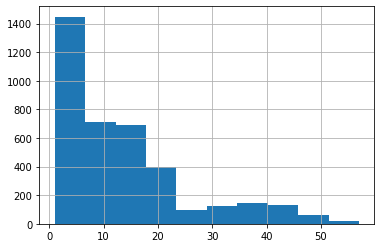

In [40]:
# Average word count of image tweets
print(trump_2020_image['word_count'].describe())
trump_2020_image['word_count'].hist()
plt.show()

We can see that in 2020, Donald Trump's average word count for tweets containing images was 13 words. 

count    3830.000000
mean       99.636031
std        72.482825
min        23.000000
25%        40.000000
50%        88.000000
75%       133.000000
max       304.000000
Name: character_len, dtype: float64


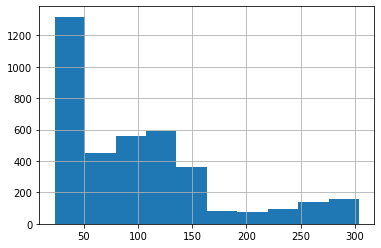

In [41]:
# Average character length of image tweets
print(trump_2020_image['character_len'].describe())
trump_2020_image['character_len'].hist()
plt.show()

We can see that in 2020, Donald Trump's average character length for tweets containing images was 100 characters. 

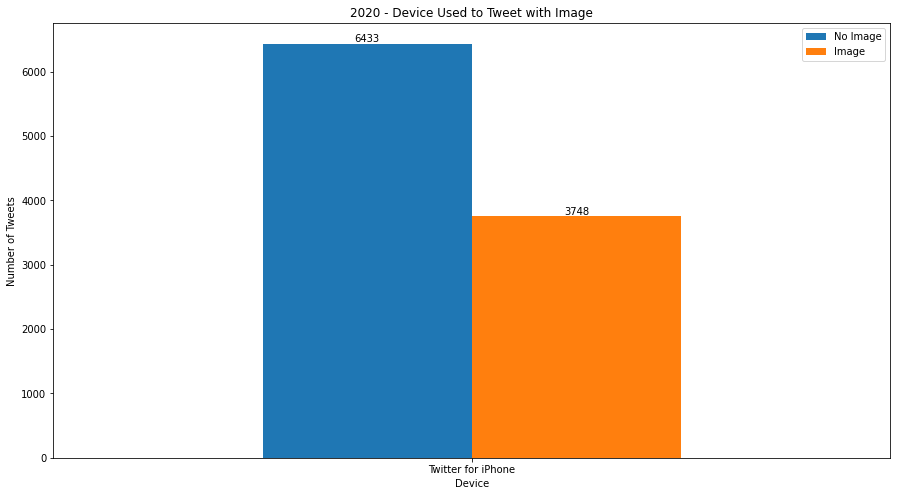

In [42]:
# Image plot vs device
title = "2020 - Device Used to Tweet with Image"
trump_2020_iphone_android = trump_2020.loc[(trump_2020['device'] == 'Twitter for iPhone'), :]

ax = trump_2020_iphone_android.text.groupby([trump_2020_iphone_android.device, trump_2020_iphone_android.Image]).count().unstack(fill_value=0).plot.bar(
    rot=0, figsize=(15,8), title=title)

# Add count text
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1), ha='center', va = 'bottom')
    
plt.xlabel('Device')
plt.ylabel('Number of Tweets')
#plt.xticks(np.arange(2),['Android', 'iPhone'])
plt.legend(['No Image', 'Image'])
plt.show()

In 2020, Donald Trump didn't use an android to tweet. The plot above shows when he tweeted from an iPhone more than half the time the tweet did not contain any images.

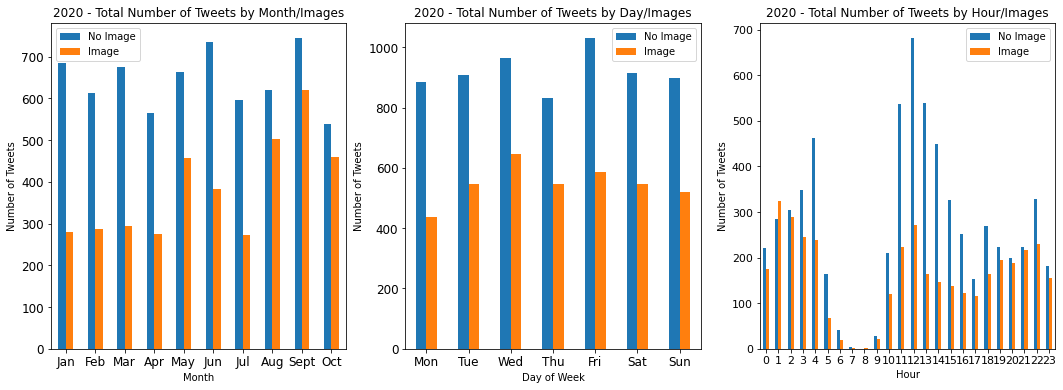

In [43]:
# Image Tweets - Month
fig_1 = plt.subplot(1,3,1)
trump_2020.text.groupby([trump_2020.datetime.dt.month, trump_2020.Image]).count().unstack(fill_value=0).plot(
    figsize=(18,6), fontsize=12, kind="bar", rot=0, ax=fig_1)
fig_1.set_title('2020 - Total Number of Tweets by Month/Images')
fig_1.set_xlabel('Month')
fig_1.set_ylabel('Number of Tweets')
plt.xticks(np.arange(10),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                          'Aug', 'Sept', 'Oct'])
plt.legend(['No Image', 'Image'])


# Image Tweets - Day of Week
fig_2 = plt.subplot(1,3,2)
trump_2020.text.groupby([trump_2020.datetime.dt.dayofweek, trump_2020.Image]).count().unstack(fill_value=0).plot(
    figsize=(18,6), fontsize=12, kind="bar", rot=0, ax=fig_2)
fig_2.set_title('2020 - Total Number of Tweets by Day/Images')
fig_2.set_xlabel('Day of Week')
fig_2.set_ylabel('Number of Tweets')
plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(['No Image', 'Image'])


# Image Tweets - Hour
fig_3 = plt.subplot(1,3,3)
trump_2020.text.groupby([trump_2020.datetime.dt.hour, trump_2020.Image]).count().unstack(fill_value=0).plot(
    figsize=(18,6), fontsize=11, kind="bar", rot=0, ax=fig_3)
fig_3.set_title('2020 - Total Number of Tweets by Hour/Images')
fig_3.set_xlabel('Hour')
fig_3.set_ylabel('Number of Tweets')
plt.legend(['No Image', 'Image'])

plt.show()

Above is a comparison of how often Donald Trump's tweets contained images in 2020 by Month, Day, and Hour. We can see that overall in 2020 Trump use less images in his tweets.

# Supervised Learning

-------
## <center><a id='Header2016_2'>2016</a></center>

### <a id='Sentiment2016'>Sentiment Analysis</a>

#### <a id='TextBlob2016'><center>TextBlob</a></center>

See **Appendix E** for a WordCloud of 2016 and 2020 TextBlob sentiment analysis.<br>
See **Appendix F** for TextBlob sentiment sample tweets.<br>
See **Appendix G** for time series analysis of TextBlob.<br>
See **Appendix H** for a WordCloud of 2016 and 2020 TextBlob subjectivity analysis.<br>
See **Appendix I** for TextBlob subjectivity sample tweets.<br>

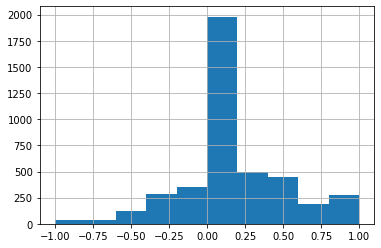

sentiment_score                                             \
                             count      mean       std    min      25%    50%   
sentiment_category                                                              
negative                     840.0 -0.286774  0.217343 -1.000 -0.38775 -0.244   
neutral                     1370.0  0.000000  0.000000  0.000  0.00000  0.000   
positive                    2015.0  0.413187  0.279505  0.003  0.17350  0.375   

                                  
                      75%    max  
sentiment_category                
negative           -0.125 -0.003  
neutral             0.000  0.000  
positive            0.574  1.000

In [44]:
# Create TextBlob Polarity and Subjectvity Column
trump_2016['blob_polarity'] = trump_2016['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
trump_2016['blob_subjectivity'] = trump_2016['text'].apply(lambda text: TextBlob(text).sentiment[1])

# Create Positive/Negative/Neutral Column
sentiment_scores_tb = [round(TextBlob(text).sentiment.polarity, 3) for text in trump_2016['text']]

sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

# Create new DataFrame with just the text, TextBlob polarity and sentiment category
trump_2016_tb = pd.DataFrame([list(trump_2016['text']), sentiment_scores_tb, sentiment_category_tb]).T

# Rename the columns
trump_2016_tb.columns = ['text', 'sentiment_score', 'sentiment_category']

# Convert Sentiment Score from object to Float
trump_2016_tb['sentiment_score'] = trump_2016_tb.sentiment_score.astype('float')

# Add a Positive/Negative/Neutral Column within the main df
def sentimentVerdict(blob_polarity):
  if blob_polarity > 0:
    return "Positive"
  elif blob_polarity < 0:
    return "Negative"
  else:
    return "Neutral"

trump_2016['TextBlob'] = trump_2016['blob_polarity'].apply(lambda x: sentimentVerdict(x))

# Visualize the TextBlob Polarity
trump_2016['blob_polarity'].hist()
plt.show()

# Describe the TextBlob Sentiment Analysis
display(trump_2016_tb.groupby(by=['sentiment_category']).describe())

The majority of the TextBlob polarity scores are greater than zero, which indicates that TextBlob classifies most of Donald Trump's 2016 tweets as positive.

In [45]:
# Percentage Positive Tweets - TextBlob
positive_tweets = trump_2016_tb[trump_2016_tb['sentiment_category'] == "positive"]
print(f"TextBlob classifies {round((positive_tweets.shape[0]/ trump_2016_tb.shape[0]) * 100)}% of Trump's 2016 tweets as positive.")

# Percentage Negative Tweets - TextBlob
negative_tweets = trump_2016_tb[trump_2016_tb['sentiment_category'] == "negative"]
print(f"TextBlob classifies {round((negative_tweets.shape[0]/ trump_2016_tb.shape[0]) * 100)}% of Trump's 2016 tweets as negative.")

# Percentage Neutral Tweets - TextBlob
neutral_tweets = trump_2016_tb[trump_2016_tb['sentiment_category'] == "neutral"]
print(f"TextBlob classifies {round((neutral_tweets.shape[0]/ trump_2016_tb.shape[0]) * 100)}% of Trump's 2016 tweets as neutral.")

TextBlob classifies 48% of Trump's 2016 tweets as positive.
TextBlob classifies 20% of Trump's 2016 tweets as negative.
TextBlob classifies 32% of Trump's 2016 tweets as neutral.


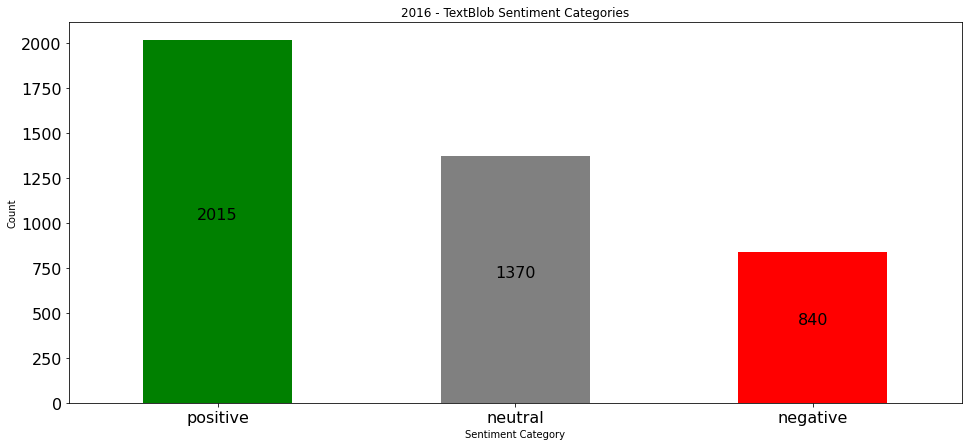

In [46]:
# Visualize the TextBlob Sentiment Categories
tb_2016_sent = trump_2016_tb.groupby('sentiment_category').count().sort_values('sentiment_score', ascending = False)
title = '2016 - TextBlob Sentiment Categories'
ax = tb_2016_sent['sentiment_score'].plot(
    kind='bar', color = ['green', 'gray', 'red'],
    figsize=(16,7), rot=0, fontsize=16, title = title)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*.5), ha='center', va = 'bottom', fontsize=16)
plt.show()

From the plot above we can see that TextBlob classified 2,105 of Donald Trump's 2016 tweets as postive, 1,370 as neutral, and only 840 tweets as negative.

-----
Below is analysis on TextBlobs subjectivity classification.

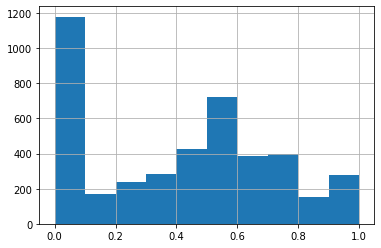

subjective_score                                         \
                               count      mean       std    min  25%    50%   
subjective_category                                                           
factual                       2608.0  0.203773  0.204515  0.000  0.0  0.150   
opinion                       1617.0  0.723296  0.146100  0.501  0.6  0.706   

                                 
                       75%  max  
subjective_category              
factual              0.408  0.5  
opinion              0.808  1.0

In [47]:
# Create Opinion/Fact Column
subjective_scores_tb = [round(TextBlob(text).sentiment[1], 3) for text in trump_2016['text']]

subjective_category_tb = ['opinion' if score > 0.5 
                             else 'factual'  
                                for score in subjective_scores_tb]

# Create new DataFrame with just the text, TextBlob Subjectivity and Subjectivity category
trump_2016_subjective_tb = pd.DataFrame([list(trump_2016['text']), subjective_scores_tb, subjective_category_tb]).T

# Rename the columns
trump_2016_subjective_tb.columns = ['text', 'subjective_score', 'subjective_category']

# Convert Subjectivity Score from object to Float
trump_2016_subjective_tb['subjective_score'] = trump_2016_subjective_tb.subjective_score.astype('float')

# Add a Opinon/Fact Column within the main df
def sentimentVerdict(blob_subjectivity):
  if blob_subjectivity > 0.5:
    return "Opinion"
  else:
    return "Factual"

trump_2016['TextBlob_Subjectivity'] = trump_2016['blob_subjectivity'].apply(lambda x: sentimentVerdict(x))

# Visualize the Subjectivity 
trump_2016['blob_subjectivity'].hist()
plt.show()

# Describe the TextBlob Subjectivity
display(trump_2016_subjective_tb.groupby(by=['subjective_category']).describe())

The subjectivity classification of TextBlob defines whether the text is opinion or fact based. A higher subjectivity score means it is less objective, and more opinionated.

The majority of the TextBlob subjectivity scores are less than 0.5, which indicates that TextBlob classifies most of Donald Trump's 2016 tweets as factual. 

In [48]:
# Percentage Factual Tweets - TextBlob
factual_tweets = trump_2016_subjective_tb[trump_2016_subjective_tb['subjective_category'] == "factual"]
print(f"TextBlob classifies {round((factual_tweets.shape[0]/ trump_2016_subjective_tb.shape[0]) * 100)}% of Trump's 2016 tweets as factual.")

# Percentage Opinion Tweets - TextBlob
opinion_tweets = trump_2016_subjective_tb[trump_2016_subjective_tb['subjective_category'] == "opinion"]
print(f"TextBlob classifies {round((opinion_tweets.shape[0]/ trump_2016_subjective_tb.shape[0]) * 100)}% of Trump's 2016 tweets as opinion.")

TextBlob classifies 62% of Trump's 2016 tweets as factual.
TextBlob classifies 38% of Trump's 2016 tweets as opinion.


Below is a graph that displays the total number of tweets that TextBlob classified as factual or opinion.

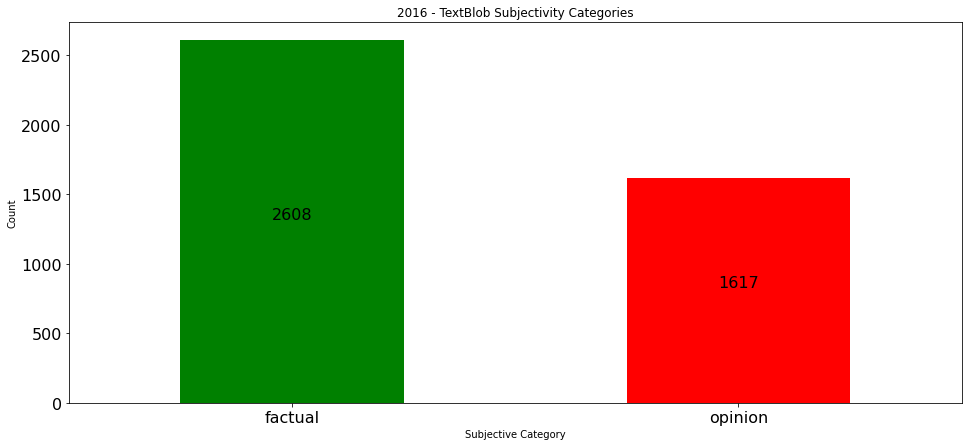

In [49]:
# Visualize the TextBlob Subjectivity Categories
tb_2016_sent = trump_2016_subjective_tb.groupby('subjective_category').count().sort_values('subjective_score', ascending = False)
title = '2016 - TextBlob Subjectivity Categories'
ax = tb_2016_sent['subjective_score'].plot(
    kind='bar',color = ['green', 'red'],
    figsize=(16,7), rot=0, fontsize=16, title = title)
plt.xlabel('Subjective Category')
plt.ylabel('Count')
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*.5), ha='center', va = 'bottom', fontsize=16)
plt.show()

From the plot above we can see that TextBlob classified 2,608 of Donald Trump's 2016 tweets as fact, and 1617 as opinon.

#### <a id='Vader2016'><center>Vader</a></center>

See **Appendix J** for a WordCloud of 2016 and 2020 Vader sentiment analysis.<br>
See **Appendix K** for Vader sentiment sample tweets.<br>
See **Appendix L** for time series analysis of Vader.<br>

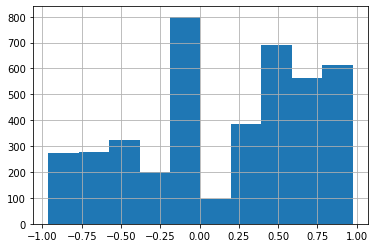

compound_score                                              \
                            count      mean       std     min     25%     50%   
sentiment_category                                                              
negative                   1155.0 -0.561683  0.225370 -0.9631 -0.7605 -0.5684   
neutral                     725.0 -0.000167  0.003315 -0.0387  0.0000  0.0000   
positive                   2345.0  0.586887  0.220073  0.0516  0.4199  0.5882   

                                    
                       75%     max  
sentiment_category                  
negative           -0.4003 -0.0516  
neutral             0.0000  0.0258  
positive            0.7840  0.9744

In [50]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    
# Create Vader Rating Columns
trump_2016['vader_rating'] = trump_2016['text'].apply(analyzer.polarity_scores)
trump_2016 = pd.concat([trump_2016.drop(['vader_rating'], axis=1), trump_2016['vader_rating'].apply(pd.Series)], axis=1)   

# Create Positive/Negative/Neutral Column
sentiment_scores_vader = round(trump_2016['compound'], 4)
sentiment_category_vader = ['positive' if compound >= 0.05 
                             else 'negative' if compound <= -0.05 
                                 else 'neutral' 
                                     for compound in sentiment_scores_vader]

# Create new DataFrame with just the text, Vader compound polarity and sentiment category
trump_2016_vader = pd.DataFrame([list(trump_2016['text']), sentiment_scores_vader, sentiment_category_vader]).T

# Rename the columns
trump_2016_vader.columns = ['text', 'compound_score', 'sentiment_category']

# Convert Compound Score from object to Float
trump_2016_vader['compound_score'] = trump_2016_vader['compound_score'].astype('float')

# Add a Positive/Negative/Neutral Column within the main df
trump_2016['sentiment'] = trump_2016['text'].apply(lambda x: sid.polarity_scores(x))

def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"
trump_2016['VADER'] = trump_2016['sentiment'].apply(lambda x: sentimentVerdict(x))
trump_2016.drop(['sentiment'], axis=1, inplace=True)

# Visualize Vader Compound Score
trump_2016['compound'].hist()
plt.show()

# Describe the Vader Sentiment Analysis
display(trump_2016_vader.groupby(by=['sentiment_category']).describe())

The majority of the Vader compound scores are greater than or equal to 0.05, which indicates that Vader classifies most of Donald Trump's 2016 tweets as positive.

In [51]:
# Percentage Positive Tweets - Vader
positive_tweets = trump_2016_vader[trump_2016_vader['sentiment_category'] == "positive"]
print(f"Vader classifies {round((positive_tweets.shape[0]/ trump_2016_vader.shape[0]) * 100)}% of Trump's 2016 tweets as positive.")

# Percentage Negative Tweets - Vader
negative_tweets = trump_2016_vader[trump_2016_vader['sentiment_category'] == "negative"]
print(f"Vader classifies {round((negative_tweets.shape[0]/ trump_2016_vader.shape[0]) * 100)}% of Trump's 2016 tweets as negative.")

# Percentage Neutral Tweets - Vader
neutral_tweets = trump_2016_vader[trump_2016_vader['sentiment_category'] == "neutral"]
print(f"Vader classifies {round((neutral_tweets.shape[0]/ trump_2016_vader.shape[0]) * 100)}% of Trump's 2016 tweets as neutral.")

Vader classifies 56% of Trump's 2016 tweets as positive.
Vader classifies 27% of Trump's 2016 tweets as negative.
Vader classifies 17% of Trump's 2016 tweets as neutral.


Below is a graph that displays the total number of tweets that Vader classified into each sentiment category.

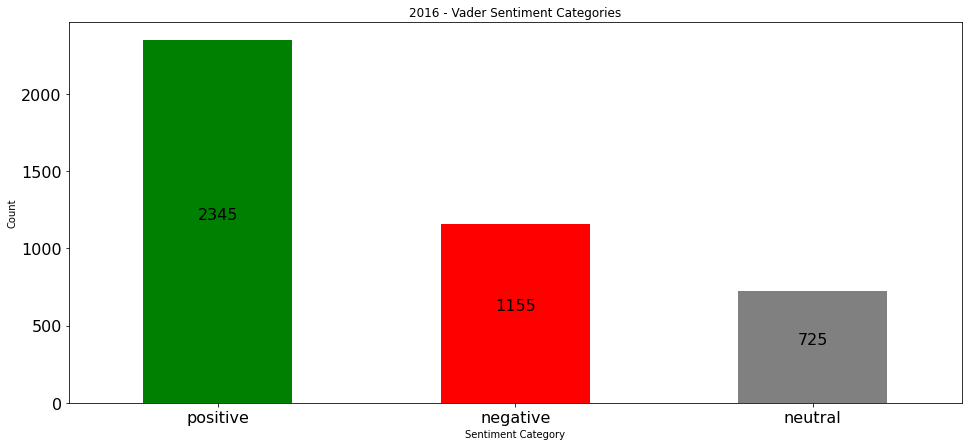

In [52]:
# Visualize the Vader Sentiment Categories
vader_2016_sent = trump_2016_vader.groupby('sentiment_category').count().sort_values('compound_score', ascending = False)
title = '2016 - Vader Sentiment Categories'
ax = vader_2016_sent['compound_score'].plot(
    kind='bar', color = ['green', 'red', 'gray'],
    figsize = (16,7), rot=0, fontsize=16, title = title)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*.5), ha='center', va = 'bottom', fontsize=16)
plt.show()

From the plot above we can see that Vader classified 2,345 of Donald Trump's 2016 tweets as postive, 1,155 as negative, and only 725 tweets as neutral.

-------
Below is a chart and graph comparing TextBlob and Vader sentiment analysis. The chart shows the agreement in sentiment between TextBlob and Vader. TextBlob and Vader agreed on Negative sentiment 625 times. TextBlob and Vader agreed on Neutral sentiment 484 times. TextBlob and Vader agreed on Positive sentiment 1,561 times. Overall, TextBlob and Vader agree the most in Positive classification.

In [53]:
trump_2016.text.groupby([trump_2016.TextBlob, trump_2016.VADER]).count()

TextBlob  VADER   
Negative  Negative     625
          Neutral       77
          Positive     139
Neutral   Negative     238
          Neutral      484
          Positive     645
Positive  Negative     292
          Neutral      164
          Positive    1561
Name: text, dtype: int64

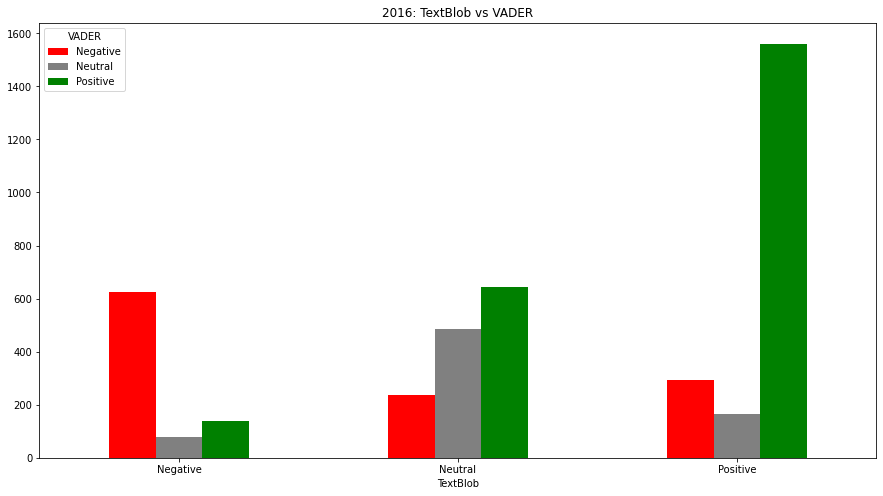

In [54]:
title = '2016: TextBlob vs VADER'
trump_2016.text.groupby([trump_2016.TextBlob, trump_2016.VADER]).count().unstack(fill_value=0).plot.bar(
    rot=0, figsize=(15,8), color = ['red', 'gray', 'green'], title=title)
    
plt.show()

### <a id='TopicModeling2016'>Topic Modeling</a>

#### <a id='LDA2016'><center>LDA</a></center>
See **Appendix M** for LDA topic sample tweets.<br>



In [55]:
np.random.seed(0)

# Set stop words
vectorizer = CountVectorizer(stop_words=stops)

# Create the model vectorizer
# .fit() applies to the feature extractor and determines what features will be based on  - text
model = vectorizer.fit(trump_2016.text)

# Create a vector by passing the text into the vectorizer to return counts
docs = vectorizer.transform(trump_2016.text)

# Using the LDA algorithm with 5 topics to print the most important words for each topic
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(docs)

# Create function to print the top words of each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: hillary crooked would cruz nytimes failing people obama ted obamacare
Topic #1: trump trump2016 thank makeamericagreatagain realdonaldtrump rubio people cruz jobs marco
Topic #2: great america thank make trump new people last night win
Topic #3: thank great realdonaldtrump trump2016 join america tonight makeamericagreatagain make tomorrow
Topic #4: hillary clinton crooked trump new thank realdonaldtrump bernie get bad



Above we can see the top 5 topics for Trump's tweets in 2016.

- Topic #0: Campaign competitors
- Topic #1: Campaign slogans
- Topic #2: Is about the debates
- Topic #3: Campaign
- Topic #4: Campaign competitors

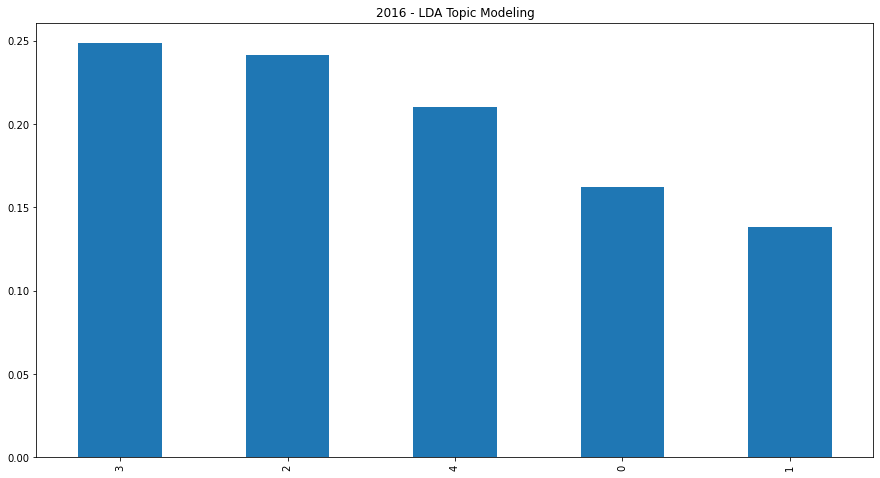

In [56]:
# How often does Trump tweet about each topic above
trump_2016['Topic_LDA']=lda.transform(docs).argmax(axis=1)

title = '2016 - LDA Topic Modeling'
trump_2016.Topic_LDA.value_counts(normalize=True).plot.bar(figsize=(15,8), title = title)
plt.show()

We can see that Trump tweeted about Topic #3 the most, and Topic #1 the least. 


We can analyze the topics against time series to see when certain topics peaked and if we explore the news cycle we can maybe see why certain topics peaked at certain times

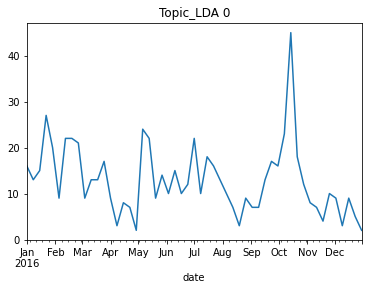

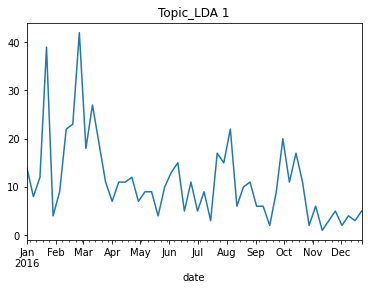

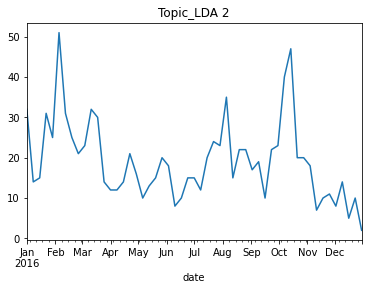

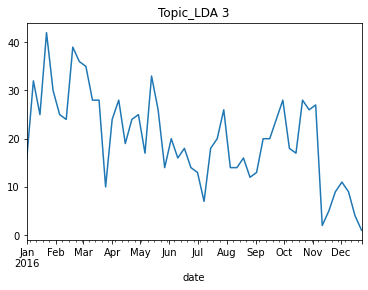

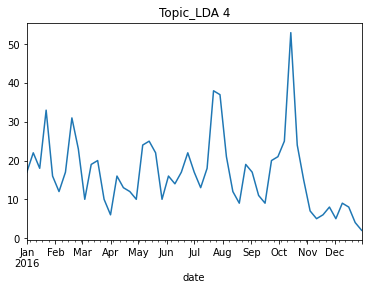

In [57]:
# Time Series x Topic  Modeling
trump_2016_LDA = trump_2016.copy(deep = True)

trump_2016_LDA['date'] = pd.to_datetime(trump_2016_LDA.date,yearfirst=True)
trump_2016_LDA.index = trump_2016_LDA.date

for i in range(5):
    temp = trump_2016_LDA[trump_2016_LDA.Topic_LDA == i]
    temp.resample('7D').size().plot()
    plt.title('Topic_LDA %s' %i)
    plt.show()

Almost all of the topics had a clear increase in weekly tweets towards the end of October, which corresponds to the 2016 election. Interestingly, several topics had spikes in March which corresponds with the beginning of the Republican Primary election.

#### <a id='NMF2016'><center>NMF</a></center>
See **Appendix N** for NMF topic sample tweets.<br>


In [58]:
np.random.seed(0)

# Set stop words
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stops)

# Create the model vectorizer
# .fit() applies to the feature extractor and determines what features will be based on  - text
#model = vectorizer.fit(trump_2016.text)

# Create a vector by passing the text into the vectorizer to return counts
doc_term_matrix = tfidf_vect.fit_transform(trump_2016['text'].values.astype('U'))


# Using the NMF algorithm with 5 topics to print the most important words for each topic
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

# Create function to print the top words of each topic
def print_top_words(nmf, feature_names, n_top_words):
    for topic_idx, topic in enumerate(nmf.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[-10:][:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(nmf,tfidf_vect.get_feature_names(),10)

Topic #0: thank new trump2016 americafirst poll support imwithyou hampshire trump2016https maga
Topic #1: america make great safe let work hard together never going
Topic #2: hillary trump realdonaldtrump clinton crooked people president vote cruz bad
Topic #3: makeamericagreatagain trump2016 trump2016https tomorrow realdonaldtrump join supertuesday indiana votetrump arizona
Topic #4: enjoy interviewed tonight 00 foxnews foxandfriends oreillyfactor morning seanhannity join



Above we can see the top 5 topics for Trump's tweets in 2016.

- Topic #0: Voting
- Topic #1: Campaign slogans
- Topic #2: Campaign competitors
- Topic #3: Voting
- Topic #4: Interviews

In [59]:
topic_values = nmf.transform(doc_term_matrix)
trump_2016['Topic_NMF'] = topic_values.argmax(axis=1)

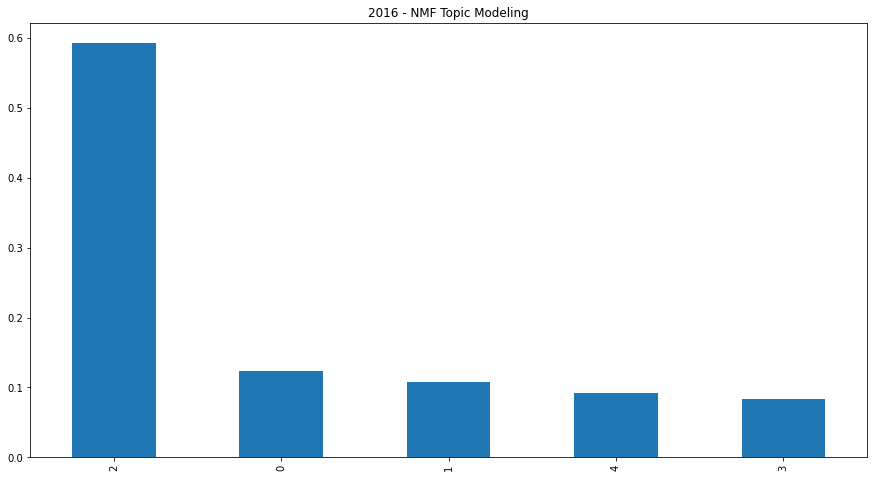

In [60]:
# How often does Trump tweet about each topic above
title = '2016 - NMF Topic Modeling'
trump_2016.Topic_NMF.value_counts(normalize=True).plot.bar(figsize=(15,8), title = title)
plt.show()

We can see that Trump tweeted about Topic #2 the most, and Topic #3 the least. 

We can analyze the topics against time series to see when certain topics peaked and if we explore the news cycle we can maybe see why certain topics peaked at certain times.

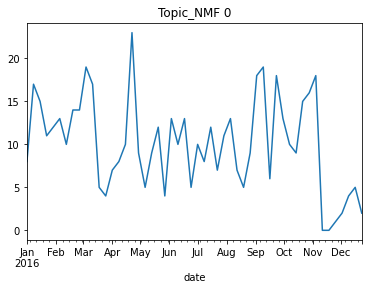

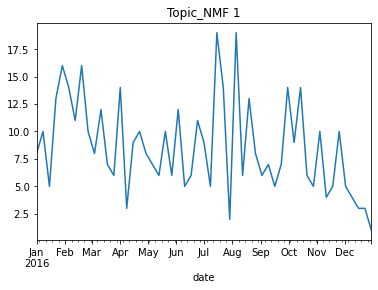

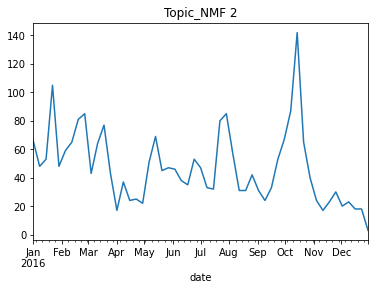

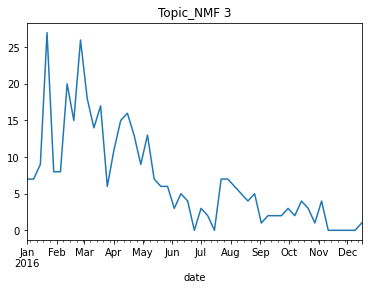

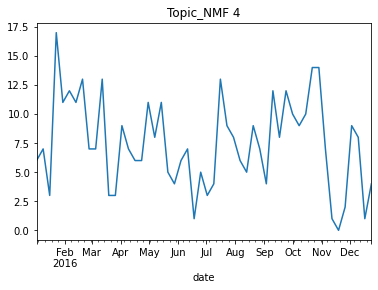

In [61]:
# Time Series x Topic  Modeling
trump_2016_NMF = trump_2016.copy(deep = True)

trump_2016_NMF['date'] = pd.to_datetime(trump_2016_NMF.date,yearfirst=True)
trump_2016_NMF.index = trump_2016_NMF.date

for i in range(5):
    temp = trump_2016_NMF[trump_2016_NMF.Topic_NMF == i]
    temp.resample('7D').size().plot()
    plt.title('Topic_NMF %s' %i)
    plt.show()

Almost all of the topics had a clear increase in weekly tweets towards the end of October, which corresponds to the 2016 election. Interestingly, several topics had spikes in March which corresponds with the beginning of the Republican Primary election.

-------
## <center><a id='Header2020_2'>2020</a></center>

### <a id='Sentiment2020'>Sentiment Analysis</a>

#### <a id='TextBlob2020'><center>TextBlob</a></center>

See **Appendix E** for a WordCloud of 2016 and 2020 TextBlob sentiment analysis.<br>
See **Appendix F** for TextBlob sentiment sample tweets.<br>
See **Appendix G** for time series analysis of TextBlob.<br>
See **Appendix H** for a WordCloud of 2016 and 2020 TextBlob subjectivity analysis.<br>
See **Appendix I** for TextBlob subjectivity sample tweets.<br>

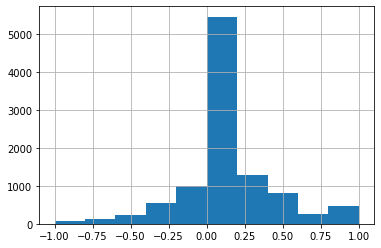

sentiment_score                                           \
                             count      mean       std    min    25%    50%   
sentiment_category                                                            
negative                    1955.0 -0.257742  0.225603 -1.000 -0.350 -0.194   
neutral                     3664.0  0.000000  0.000000  0.000  0.000  0.000   
positive                    4644.0  0.349292  0.267569  0.001  0.136  0.268   

                                  
                      75%    max  
sentiment_category                
negative           -0.095 -0.001  
neutral             0.000  0.000  
positive            0.500  1.000

In [62]:
# Create TextBlob Polarity and Subjectvity Column
trump_2020['blob_polarity'] = trump_2020['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
trump_2020['blob_subjectivity'] = trump_2020['text'].apply(lambda text: TextBlob(text).sentiment[1])

# Create Positive/Negative/Neutral Column
sentiment_scores_tb = [round(TextBlob(text).sentiment.polarity, 3) for text in trump_2020['text']]

sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

# Create new DataFrame with just the text, TextBlob polarity and sentiment category
trump_2020_tb = pd.DataFrame([list(trump_2020['text']), sentiment_scores_tb, sentiment_category_tb]).T

# Rename the columns
trump_2020_tb.columns = ['text', 'sentiment_score', 'sentiment_category']

# Convert Sentiment Score from object to Float
trump_2020_tb['sentiment_score'] = trump_2020_tb.sentiment_score.astype('float')

# Add a Positive/Negative/Neutral Column within the main df
def sentimentVerdict(blob_polarity):
  if blob_polarity > 0:
    return "Positive"
  elif blob_polarity < 0:
    return "Negative"
  else:
    return "Neutral"

trump_2020['TextBlob'] = trump_2020['blob_polarity'].apply(lambda x: sentimentVerdict(x))

# Visualize the TextBlob Polarity
trump_2020['blob_polarity'].hist()
plt.show()

# Describe the TextBlob Sentiment Analysis
display(trump_2020_tb.groupby(by=['sentiment_category']).describe())

The slight majority of the TextBlob polarity scores are greater than zero, which indicates that TextBlob classifies most of Donald Trump's 2020 tweets as positive.

In [63]:
# Percentage Positive Tweets - TextBlob
positive_tweets = trump_2020_tb[trump_2020_tb['sentiment_category'] == "positive"]
print(f"TextBlob classifies {round((positive_tweets.shape[0]/ trump_2020_tb.shape[0]) * 100)}% of Trump's 2020 tweets as positive.")

# Percentage Negative Tweets - TextBlob
negative_tweets = trump_2020_tb[trump_2020_tb['sentiment_category'] == "negative"]
print(f"TextBlob classifies {round((negative_tweets.shape[0]/ trump_2020_tb.shape[0]) * 100)}% of Trump's 2020 tweets as negative.")

# Percentage Neutral Tweets - TextBlob
neutral_tweets = trump_2020_tb[trump_2020_tb['sentiment_category'] == "neutral"]
print(f"TextBlob classifies {round((neutral_tweets.shape[0]/ trump_2020_tb.shape[0]) * 100)}% of Trump's 2020 tweets as neutral.")

TextBlob classifies 45% of Trump's 2020 tweets as positive.
TextBlob classifies 19% of Trump's 2020 tweets as negative.
TextBlob classifies 36% of Trump's 2020 tweets as neutral.


Below is a graph that displays the total number of tweets that TextBlob classified into each sentiment category.

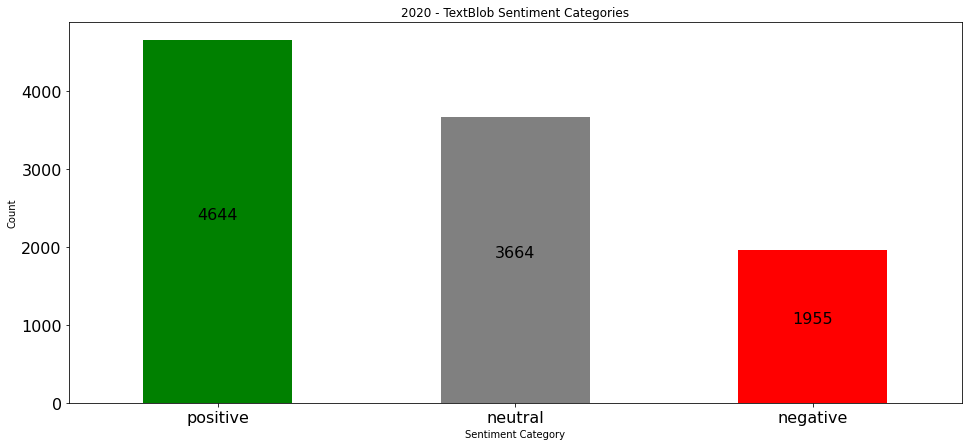

In [64]:
# Visualize the TextBlob Sentiment Categories
tb_2020_sent = trump_2020_tb.groupby('sentiment_category').count().sort_values('sentiment_score', ascending = False)
title = '2020 - TextBlob Sentiment Categories'
ax = tb_2020_sent['sentiment_score'].plot(
    kind='bar', color = ['green', 'gray', 'red'],
    figsize=(16,7), rot=0, fontsize=16, title = title)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*.5), ha='center', va = 'bottom', fontsize=16)
plt.show()

From the plot above we can see that TextBlob classified 4,664 of Donald Trump's 2020 tweets as postive, 3,664 as neutral, and only 1,955 tweets as negative.

-----
Below is analysis on TextBlobs subjectivity classification.

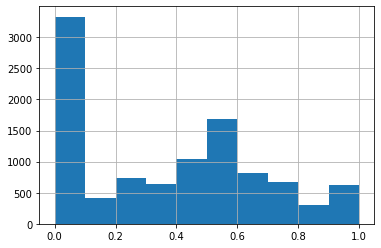

subjective_score                                           \
                               count      mean       std    min    25%    50%   
subjective_category                                                             
factual                       6826.0  0.186552  0.200247  0.000  0.000  0.100   
opinion                       3437.0  0.716620  0.151894  0.501  0.594  0.688   

                               
                     75%  max  
subjective_category            
factual              0.4  0.5  
opinion              0.8  1.0

In [65]:
# Create Opinion/Fact Column
subjective_scores_tb = [round(TextBlob(text).sentiment[1], 3) for text in trump_2020['text']]

subjective_category_tb = ['opinion' if score > 0.5 
                             else 'factual'  
                                for score in subjective_scores_tb]

# Create new DataFrame with just the text, TextBlob Subjectivity and Subjectivity category
trump_2020_subjective_tb = pd.DataFrame([list(trump_2020['text']), subjective_scores_tb, subjective_category_tb]).T

# Rename the columns
trump_2020_subjective_tb.columns = ['text', 'subjective_score', 'subjective_category']

# Convert Sentiment Score from object to Float
trump_2020_subjective_tb['subjective_score'] = trump_2020_subjective_tb.subjective_score.astype('float')

# Add a Opinon/Fact Column within the main df
def sentimentVerdict(blob_subjectivity):
  if blob_subjectivity > 0.5:
    return "Opinion"
  else:
    return "Factual"

trump_2020['TextBlob_Subjectivity'] = trump_2020['blob_subjectivity'].apply(lambda x: sentimentVerdict(x))

# Visualize the Subjectivity 
trump_2020['blob_subjectivity'].hist()
plt.show()


# Describe the TextBlob Subjectivity
display(trump_2020_subjective_tb.groupby(by=['subjective_category']).describe())

The subjectivity classification of TextBlob defines whether the text is opinion or fact based. A higher subjectivity score means it is less objective, and more opinionated.

The majority of the TextBlob subjectivity scores are less than 0.5, which indicates that TextBlob classifies most of Donald Trump's 2020 tweets as factual.

Below is a graph that displays the total number of tweets that TextBlob classified as factual or opinion.

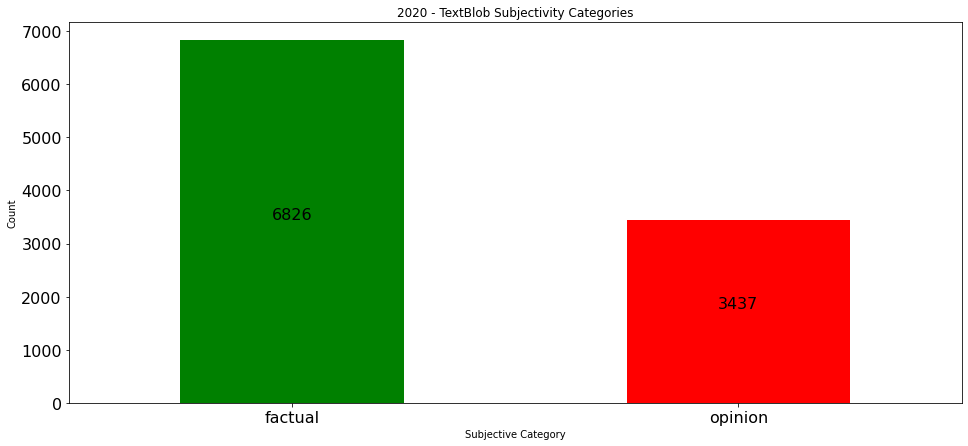

In [66]:
# Visualize the TextBlob Subjectivity Categories
tb_2020_sent = trump_2020_subjective_tb.groupby('subjective_category').count().sort_values('subjective_score', ascending = False)
title = '2020 - TextBlob Subjectivity Categories'
ax = tb_2020_sent['subjective_score'].plot(
    kind='bar', color = ['green', 'red'],
    figsize=(16,7), rot=0, fontsize=16, title = title)
plt.xlabel('Subjective Category')
plt.ylabel('Count')
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*.5), ha='center', va = 'bottom', fontsize=16)
plt.show()

From the plot above we can see that TextBlob classified 6,826 of Donald Trump's 2020 tweets as factual, and 3,437 as opinion.

#### <a id='Vader2020'><center>Vader</a></center>

See **Appendix J** for a WordCloud of 2016 and 2020 Vader sentiment analysis.<br>
See **Appendix K** for Vader sentiment sample tweets.<br>
See **Appendix L** for time series analysis of Vader.<br>



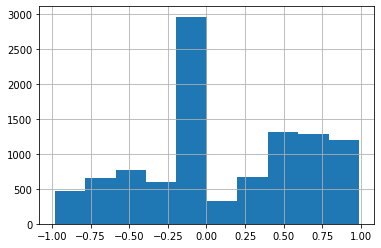

compound_score                                              \
                            count      mean       std     min     25%     50%   
sentiment_category                                                              
negative                   2773.0 -0.521579  0.237100 -0.9829 -0.7192 -0.5255   
neutral                    2715.0 -0.000092  0.004295 -0.0473  0.0000  0.0000   
positive                   4775.0  0.592158  0.233676  0.0516  0.4199  0.6114   

                                    
                       75%     max  
sentiment_category                  
negative           -0.3382 -0.0513  
neutral             0.0000  0.0387  
positive            0.7913  0.9879

In [67]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    
# Create Vader Rating Columns
trump_2020['vader_rating'] = trump_2020['text'].apply(analyzer.polarity_scores)
trump_2020 = pd.concat([trump_2020.drop(['vader_rating'], axis=1), trump_2020['vader_rating'].apply(pd.Series)], axis=1)   

# Create Positive/Negative/Neutral Column
sentiment_scores_vader = round(trump_2020['compound'], 4)
sentiment_category_vader = ['positive' if compound >= 0.05 
                             else 'negative' if compound <= -0.05 
                                 else 'neutral' 
                                     for compound in sentiment_scores_vader]

# Create new DataFrame with just the text, Vader compound polarity and sentiment category
trump_2020_vader = pd.DataFrame([list(trump_2020['text']), sentiment_scores_vader, sentiment_category_vader]).T

# Rename the columns
trump_2020_vader.columns = ['text', 'compound_score', 'sentiment_category']

# Convert Compound Score from object to Float
trump_2020_vader['compound_score'] = trump_2020_vader['compound_score'].astype('float')

# Convert Compound Score from object to Float
trump_2016_vader['compound_score'] = trump_2016_vader['compound_score'].astype('float')

# Add a Positive/Negative/Neutral Column within the main df
trump_2020['sentiment'] = trump_2020['text'].apply(lambda x: sid.polarity_scores(x))

def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"
trump_2020['VADER'] = trump_2020['sentiment'].apply(lambda x: sentimentVerdict(x))
trump_2020.drop(['sentiment'], axis=1, inplace=True)

# Visualize Vader Compound Score
trump_2020['compound'].hist()
plt.show()

# Describe the Vader Sentiment Analysis
display(trump_2020_vader.groupby(by=['sentiment_category']).describe())


The majority of the Vader compound scores are greater than or equal to 0.05, which indicates that Vader classifies most of Donald Trump's 2020 tweets as positive.

In [68]:
# Percentage Positive Tweets - Vader
positive_tweets = trump_2020_vader[trump_2020_vader['sentiment_category'] == "positive"]
print(f"Vader classifies {round((positive_tweets.shape[0]/ trump_2020_vader.shape[0]) * 100)}% of Trump's 2020 tweets as positive.")

# Percentage Negative Tweets - Vader
negative_tweets = trump_2020_vader[trump_2020_vader['sentiment_category'] == "negative"]
print(f"Vader classifies {round((negative_tweets.shape[0]/ trump_2020_vader.shape[0]) * 100)}% of Trump's 2020 tweets as negative.")

# Percentage Neutral Tweets - Vader
neutral_tweets = trump_2020_vader[trump_2020_vader['sentiment_category'] == "neutral"]
print(f"Vader classifies {round((neutral_tweets.shape[0]/ trump_2020_vader.shape[0]) * 100)}% of Trump's 2020 tweets as neutral.")


Vader classifies 47% of Trump's 2020 tweets as positive.
Vader classifies 27% of Trump's 2020 tweets as negative.
Vader classifies 26% of Trump's 2020 tweets as neutral.


Below is a graph that displays the total number of tweets that Vader classified into each sentiment category.

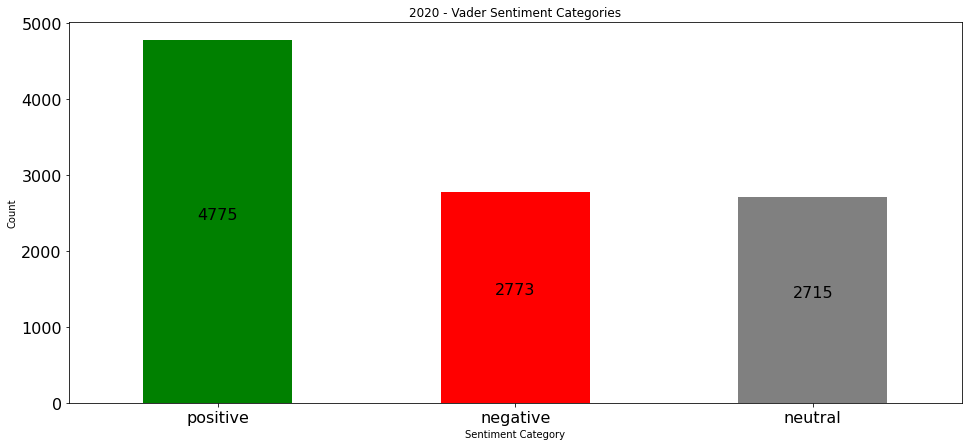

In [69]:
# Visualize the Vader Sentiment Categories
vader_2020_sent = trump_2020_vader.groupby('sentiment_category').count().sort_values('compound_score', ascending = False)
title = '2020 - Vader Sentiment Categories'
ax = vader_2020_sent['compound_score'].plot(
    kind='bar', color = ['green', 'red', 'gray'],
    figsize = (16,7), rot=0, fontsize=16, title = title)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
for p in ax.patches:
    width = p.get_width()
    height = round(p.get_height())
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*.5), ha='center', va = 'bottom', fontsize=16)
plt.show()

From the plot above we can see that Vader classified 4,775 of Donald Trump's 2020 tweets as postive, 2,773 as negative, and only 2,715 tweets as neutral.

-------
Below is a chart and graph comparing TextBlob and Vader sentiment analysis. The chart shows the agreement in sentiment between TextBlob and Vader. TextBlob and Vader agreed on Negative sentiment 1,318 times. TextBlob and Vader agreed on Neutral sentiment 1,920 times. TextBlob and Vader agreed on Positive sentiment 3,260 times. Overall, TextBlob and Vader agree the most in Positive classification.

In [70]:
trump_2020.text.groupby([trump_2020.TextBlob, trump_2020.VADER]).count()

TextBlob  VADER   
Negative  Negative    1318
          Neutral      208
          Positive     429
Neutral   Negative     656
          Neutral     1920
          Positive    1086
Positive  Negative     799
          Neutral      587
          Positive    3260
Name: text, dtype: int64

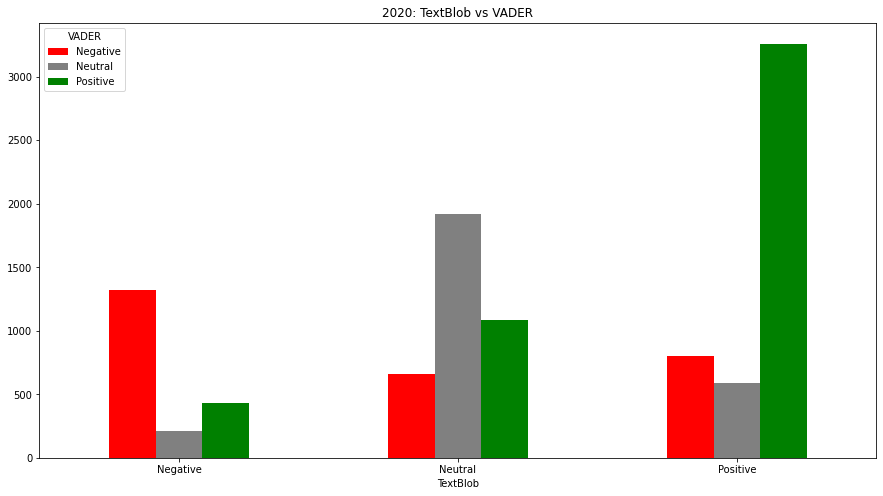

In [71]:
title = '2020: TextBlob vs VADER'
trump_2020.text.groupby([trump_2020.TextBlob, trump_2020.VADER]).count().unstack(fill_value=0).plot.bar(
    rot=0, figsize=(15,8), color = ['red', 'gray', 'green'], title=title)

plt.show()

### <a id='TopicModeling2020'>Topic Modeling</a>

#### <a id='LDA2020'><center>LDA</a></center>
See **Appendix M** for LDA topic sample tweets.<br>


In [72]:
np.random.seed(0)

# Set stop words
vectorizer = CountVectorizer(stop_words=stops)

# Create the model vectorizer
# .fit() applies to the feature extractor and determines what features will be based on  - text
model = vectorizer.fit(trump_2020.text)

# Create a vector by passing the text into the vectorizer to return counts
docs = vectorizer.transform(trump_2020.text)

# Using the LDA algorithm with 5 topics to print the most important words for each topic
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(docs)

# Create function to print the top words of each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: great america new biden make realdonaldtrump states joe big good
Topic #1: president realdonaldtrump whitehouse trump biden teamtrump live joe left american
Topic #2: great thank total complete state people endorsement maga military amendment
Topic #3: news fake trump democrats realdonaldtrump biden great media people joe
Topic #4: realdonaldtrump house people senate white biden joe president today american



Above we can see the top 5 topics for Trump's tweets in 2020.

- Topic #0: Election
- Topic #1: White House
- Topic #2: Trump Endorsements
- Topic #3: Media
- Topic #4: Election

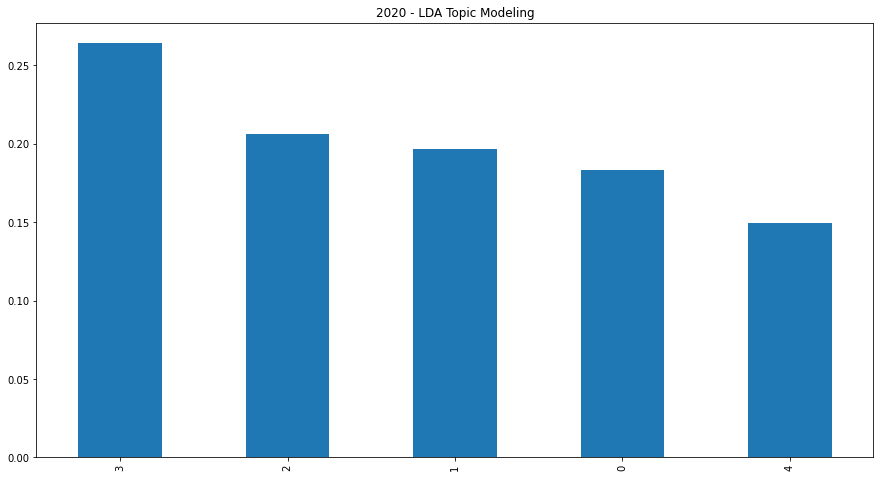

In [73]:
# How often does Trump tweet about each topic above
trump_2020['Topic_LDA']=lda.transform(docs).argmax(axis=1)

title = '2020 - LDA Topic Modeling'
trump_2020.Topic_LDA.value_counts(normalize=True).plot.bar(figsize=(15,8), title = title)
plt.show()

We can see that Trump tweeted about Topic #3 the most, and Topic #4 the least. 

We can analyze the topics against time series to see when certain topics peaked and if we explore the news cycle we can maybe see why certain topics peaked at certain times.

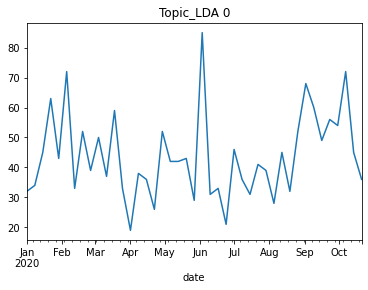

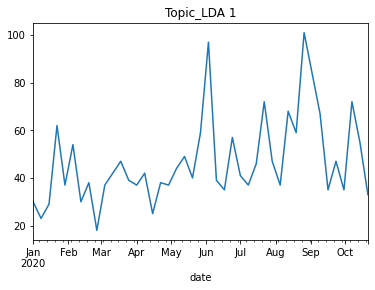

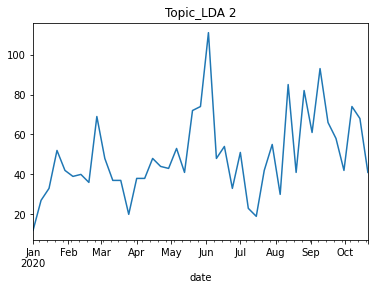

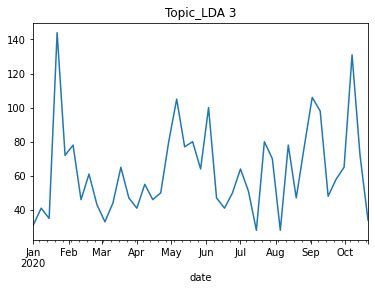

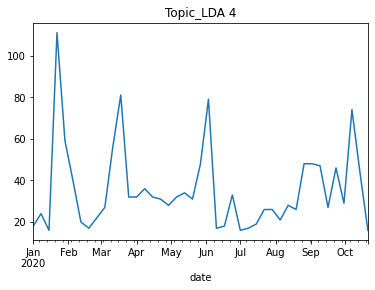

In [74]:
# Time Series x Topic  Modeling
trump_2020_LDA = trump_2020.copy(deep = True)

trump_2020_LDA['date'] = pd.to_datetime(trump_2020_LDA.date,yearfirst=True)
trump_2020_LDA.index = trump_2020_LDA.date

for i in range(5):
    temp = trump_2020_LDA[trump_2020_LDA.Topic_LDA == i]
    temp.resample('7D').size().plot()
    plt.title('Topic_LDA %s' %i)
    plt.show()

Almost all of the topics had a clear increase in weekly tweets during June, February, and the end of October. This correlates with the election and the news of Coronavirus and the spike in virus cases during the summer.

#### <a id='NMF2020'><center>NMF</a></center>
See **Appendix N** for NMF topic sample tweets.<br>



In [75]:
np.random.seed(0)

# Set stop words
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stops)

# Create the model vectorizer
# .fit() applies to the feature extractor and determines what features will be based on  - text
#model = vectorizer.fit(trump_2016.text)

# Create a vector by passing the text into the vectorizer to return counts
doc_term_matrix = tfidf_vect.fit_transform(trump_2020['text'].values.astype('U'))


# Using the NMF algorithm with 5 topics to print the most important words for each topic
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

# Create function to print the top words of each topic
def print_top_words(nmf, feature_names, n_top_words):
    for topic_idx, topic in enumerate(nmf.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[-10:][:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(nmf,tfidf_vect.get_feature_names(),10)

Topic #0: realdonaldtrump president whitehouse live holds teamtrump conference coronavirus briefing press
Topic #1: thank maga kag2020 approval rating republican party 96 carolina love
Topic #2: great america make job honor book state keep texas endorsement
Topic #3: biden joe trump people democrats vote would want never country
Topic #4: news fake conference white house media holds eastern 00 30



Above we can see the top 5 topics for Trump's tweets in 2020.

- Topic #0: Coronavirus 
- Topic #1: Polling
- Topic #2: Endorsements
- Topic #3: Democrats/Joe Biden
- Topic #4: Media

In [76]:
topic_values = nmf.transform(doc_term_matrix)
trump_2020['Topic_NMF'] = topic_values.argmax(axis=1)

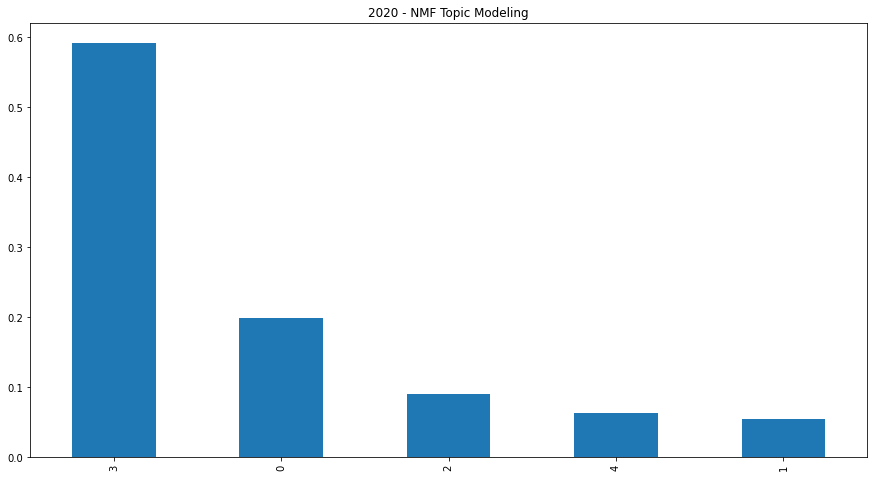

In [77]:
# How often does Trump tweet about each topic above
title = '2020 - NMF Topic Modeling'
trump_2020.Topic_NMF.value_counts(normalize=True).plot.bar(figsize=(15,8), title = title)
plt.show()

We can see that Trump tweeted about Topic #3 the most, and Topic #1 the least. 

We can analyze the topics against time series to see when certain topics peaked and if we explore the news cycle we can maybe see why certain topics peaked at certain times.


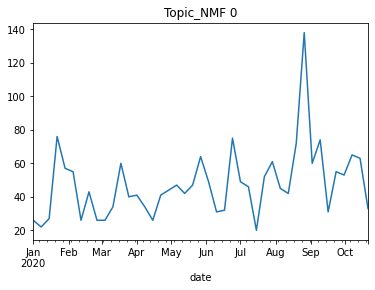

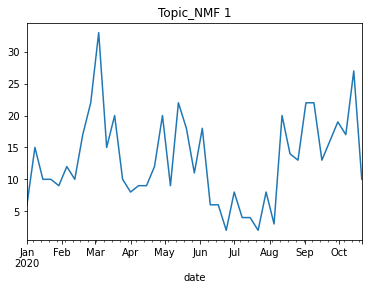

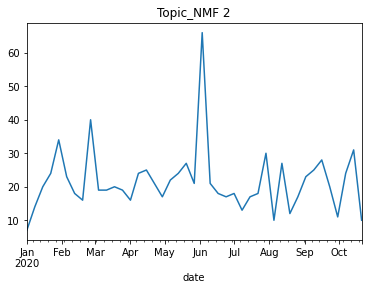

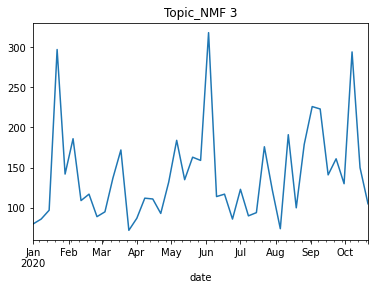

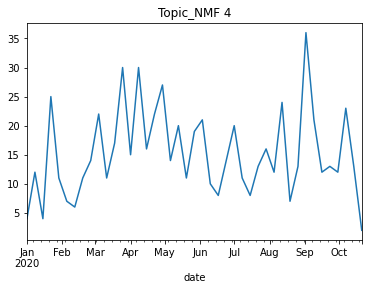

In [78]:
# Time Series x Topic  Modeling
trump_2020_NMF = trump_2020.copy(deep = True)

trump_2020_NMF['date'] = pd.to_datetime(trump_2020_NMF.date,yearfirst=True)
trump_2020_NMF.index = trump_2020_NMF.date

for i in range(5):
    temp = trump_2020_NMF[trump_2020_NMF.Topic_NMF == i]
    temp.resample('7D').size().plot()
    plt.title('Topic_NMF %s' %i)
    plt.show()

The spikes differ with the NMF model. There are spikes in February and March likely due to the announcement of Coronavirus. There are spikes in June likely due to the shutdown and first spike of cases from Coronavirus.

# Conclusions

-----



2016          |  TextBlob  | Vader |[]() |[]() | 2020         | TextBlob | Vader
:-------------|------------|-------|-----|-----|-------------|----------| -----
**Positive**  | 48\%       | 56\%  |     |     |**Positive** | 45\%     | 47\%
**Negative**  | 20\%       | 27\%  |     |     |**Negative** | 19\%     | 27\%
**Neutral**   | 32\%       | 17\%  |     |     |**Neutral**  | 36\%     | 26\%
 

Overall TextBlob and Vader classified Donald Trump's 2016 tweets similarly. Vader appears to less tweets as neutral, which could be due to the fact that Vader is more attuned to classifying social media. Overall TextBlob and Vader classified Donald Trump's 2020 tweets similarly. Vader appears to less tweets as neutral, which could be due to the fact that Vader is more attuned to classifying social media.

I was suprised by how positive both TextBlob and Vader classified Donald Trump's tweets, but that is due to my personal bias. If I continued working with this project I would likely use the Vader classifications because it is more attuned to social media and the related terminology compared to TextBlob. 

LDA seems to classify topics more evenly while NMF classifies the majority of topics into topic 3. This follows a similar outcome to the topic modeling conducted on Trump's 2016 tweets.

If I were to continue working on this project I would like to explore more time series analysis and see if I am able to obtain location data for the tweets. It would be interesting to explore whether location has an influence on the amount of tweets and sentiment analysis. I would also like to further explore topic modeling because I feel that I could devote more time to feature engineering and how it works and explore other relationships between variables (for example date/time) that I wasn't able to do explore due to time constraints. If I had more time I would also further explore sentiment analysis and its relationship to the content of the tweet (i.e. mentions, images, etc).

-----
## <a id='Ref'>References</a>

A Complete Exploratory Data Analysis and Visualization for Text Data: Combine Visualization and NLP to Generate Insights. (n.d.). Retrieved October 24, 2020, from https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html/2

Cotra, A. K. (2020, June 02). Analysis On Tweets Using Python and TWINT. Retrieved October 24, 2020, from https://towardsdatascience.com/analysis-on-tweets-using-python-and-twint-c7e6ebce8805

De Dios, E. C. (2020, June 08). Exploring the Trump Twitter Archive. Retrieved October 6, 2020, from https://towardsdatascience.com/exploring-the-trump-twitter-archive-6242e5100a74

De Dios, E. C. (2020, June 16). Exploring the Trump Twitter Archive with PyCaret. Retrieved October 6, 2020, from https://towardsdatascience.com/exploring-the-trump-twitter-archive-with-pycaret-5c9e065acd6f

Everything There Is to Know about Sentiment Analysis. (n.d.). Retrieved October 6, 2020, from https://monkeylearn.com/sentiment-analysis/

Generating Word Cloud in Python. (2020, April 18). Retrieved October 6, 2020, from https://www.geeksforgeeks.org/generating-word-cloud-python/

Hadar, Y. (2020, March 17). Exploratory Data Analysis for Text Data. Retrieved October 3, 2020, from https://medium.com/bigpanda-engineering/exploratory-data-analysis-for-text-data-29cf7dd54eb8

Kao, D. (2014, September 17). Tips: Add a toggle code cells option to your IPython notebook - part 2 [Web log post]. Retrieved December 03, 2020, from http://blog.nextgenetics.net/?e=102

Kura, S. (2020, May 28). Twitter Trends Analysis using Python. Retrieved October 24, 2020, from https://towardsdatascience.com/twitter-trends-analysis-using-python-fc78146f2f72

Li, S. (2018, May 31). Topic Modeling and Latent Dirichlet Allocation (LDA) in Python. Retrieved October 24, 2020, from https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

Li, S. (2019, March 18). A Complete Exploratory Data Analysis and Visualization for Text Data: Combine Visualization and NLP to Generate Insights. Retrieved October 24, 2020, from https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html

Libresco, L. (2016, June 21). The World's Favorite Donald Trump Tweets. Retrieved October 6, 2020, from https://fivethirtyeight.com/features/the-worlds-favorite-donald-trump-tweets/

Luvsandorj, Z. (2020, June 15). Simple wordcloud in Python. Retrieved October 6, 2020, from https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

Malik, U. (n.d.). Python for NLP: Topic Modeling. Retrieved November 10, 2020, from https://stackabuse.com/python-for-nlp-topic-modeling/

Pandey, P. (2018, September 23). Simplifying Sentiment Analysis using VADER in Python (on Social Media Text). Retrieved October 6, 2020, from https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

Robinson, D. (2016, August 9). Text analysis of Trump's tweets confirms he writes only the (angrier) Android half. Retrieved October 15, 2020, from http://varianceexplained.org/r/trump-tweets/

Said, C. (2016, February 13). How to make polished Jupyter presentations with optional code visibility [Web log post]. Retrieved December 03, 2020, from https://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

Shear, M. D., Haberman, M., Confessore, N., Yourish, K., Buchanan, L., &amp; Collins, K. (2019, November 02). How Trump Reshaped the Presidency in Over 11,000 Tweets. Retrieved December 02, 2020, from https://www.nytimes.com/interactive/2019/11/02/us/politics/trump-twitter-presidency.html

White, B. (2020, May 27). Sentiment Analysis: VADER or TextBlob? Retrieved October 6, 2020, from https://towardsdatascience.com/sentiment-analysis-vader-or-textblob-ff25514ac540

Yildirim, P. (2020, August 17). How Social Media Is Shaping Political Campaigns. Retrieved November 17, 2020, from https://knowledge.wharton.upenn.edu/article/how-social-media-is-shaping-political-campaigns/




# Presentation

This section is a placeholder for the Presentation grade. No need to do anything here.

In [79]:
HTML('''<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created by Rachel Regberg, Fall 2020, ITEC-596, <a href='#Top'>Back to Top</a>
</footer>''')